
# Исследование рынка Яндекс.недвижимости - продажа квартир

Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.  
Задача — установить параметры для определения рыночной стоимости объектов недвижимости, которые позволят построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### ОБЩАЯ ИНФОРМАЦИЯ

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')        
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Мы видим, что в половине столбцов есть пропуски. Надо изучить, какие из них важны и на что можем их заменить.

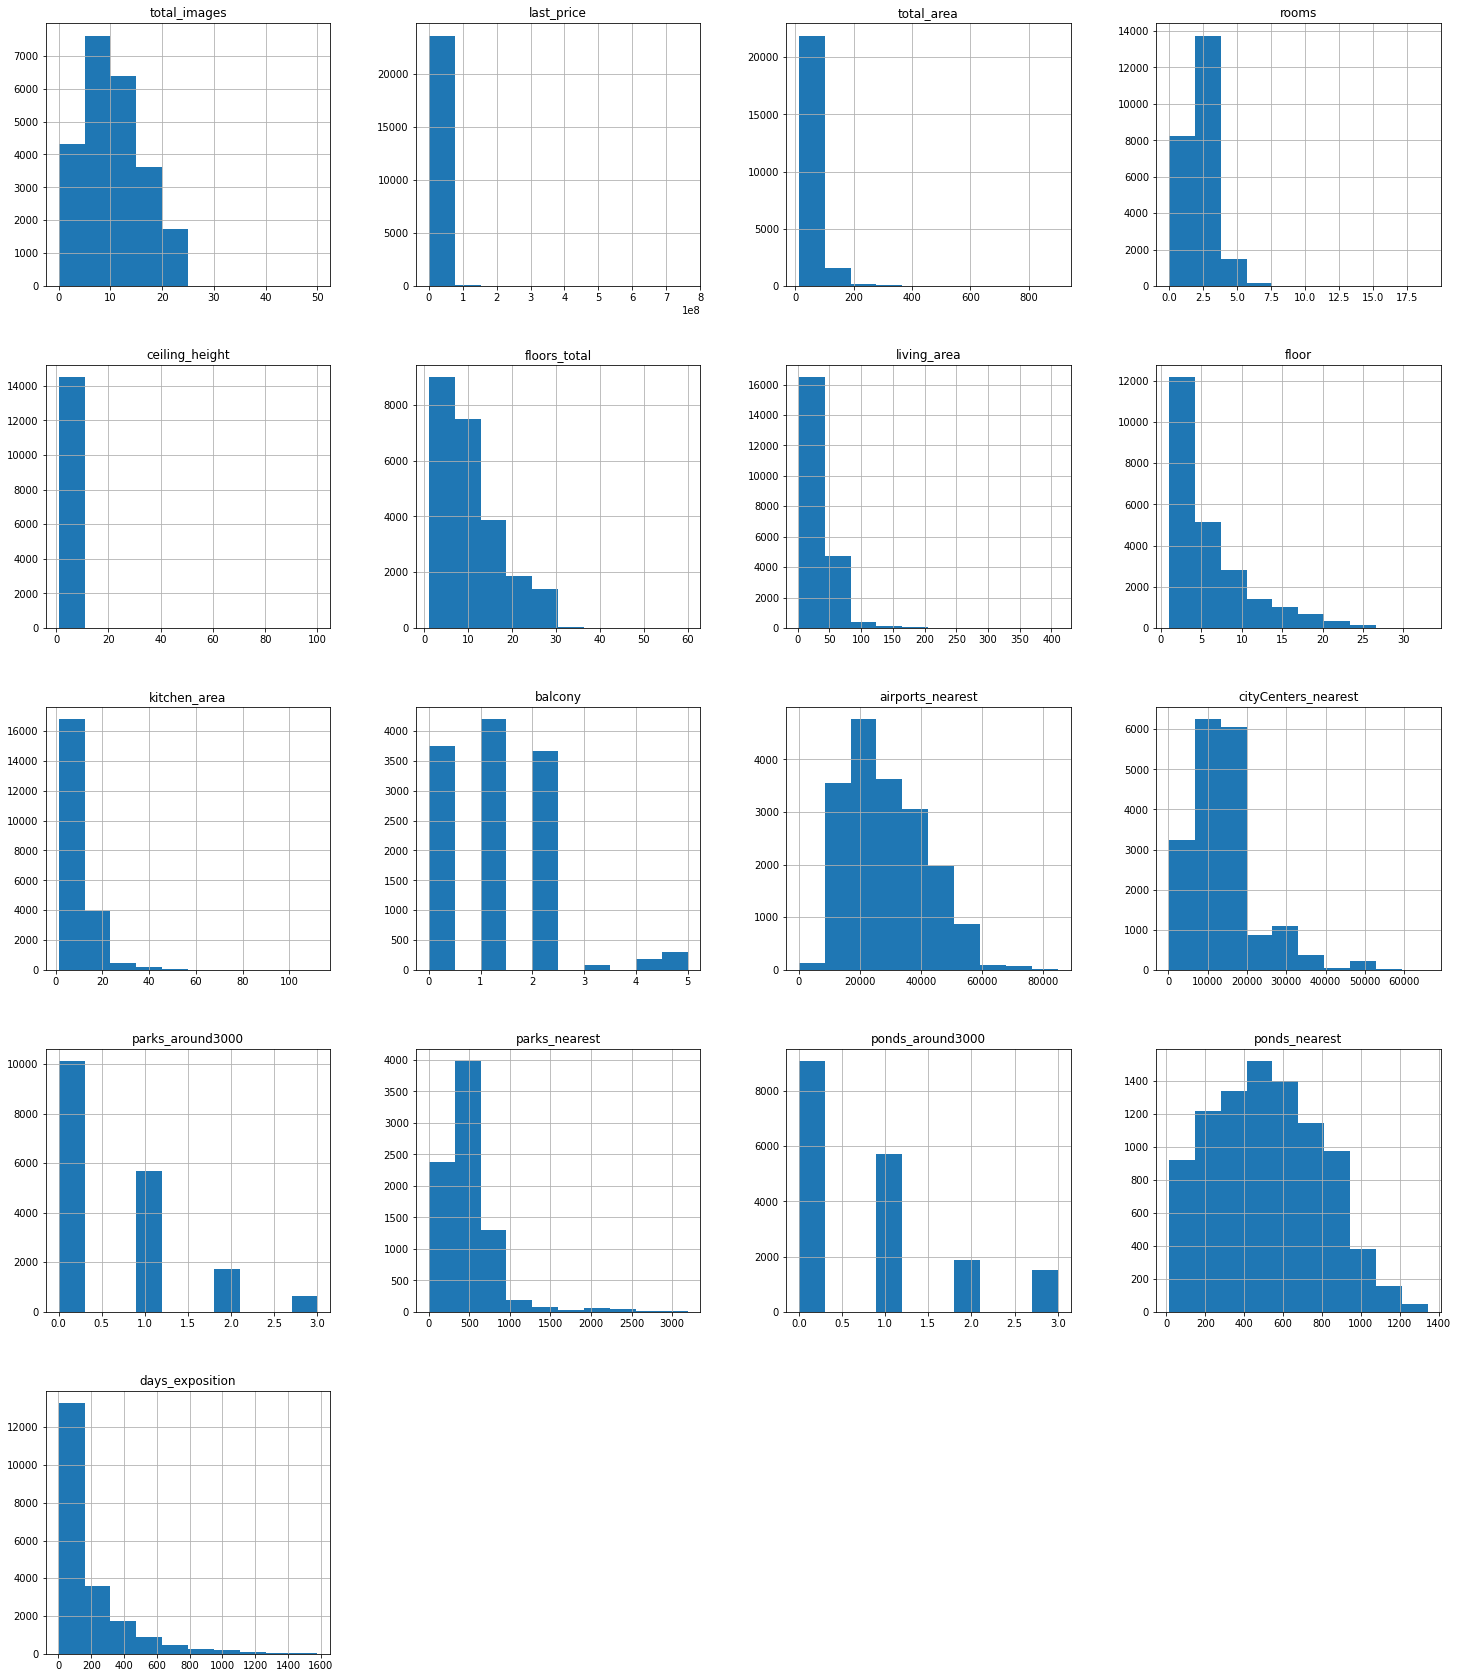

In [4]:
df.hist(figsize=(25, 30));

Что интересного на диаграммах, большинство квартир:
- имеют площадь до 100 кв.м. 
- количество комнат не более 3 
- расположены ниже 5 этажа
- имеют балкон
- удалены от центра на 10-15 км
- размещались на сайте до 4 месяцев  

Также, половина квартир имеют хотя бы один парк и один водоем в радиусе 3 км. 

Столбцы с булевыми и объектными данными не отобразились на гистаграммах. Посмотрим их отдельно:

In [5]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [6]:
df['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

In [7]:
df['open_plan'].value_counts()

False    23632
True        67
Name: open_plan, dtype: int64

In [8]:
df['locality_name'].value_counts()

Санкт-Петербург                 15721
посёлок Мурино                    522
посёлок Шушары                    440
Всеволожск                        398
Пушкин                            369
                                ...  
поселок Гладкое                     1
городской посёлок Свирьстрой        1
деревня Меньково                    1
деревня Реброво                     1
село Никольское                     1
Name: locality_name, Length: 364, dtype: int64

По данным из этих четырех столбцов видим, что большинство квартир находится в Санкт-Петербурге.  
Практически все квартиры имеют стандартную жилую планировку (студий и апартаментов крайне мало).

### ПРЕДОБРАБОТКА ДАННЫХ

#### ОФОРМЛЕНИЕ

Переименуем названия столбцов с учетом единого регистра и одинакового разделения между словами:

In [9]:
print(df.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


In [10]:
len(df.columns)

22

In [11]:
df = df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest', 'parks_around3000' : 'parks_around_3km', 'ponds_around3000' : 'ponds_around_3km'})

Поменяем столбцы местами для логического единства: поставим рядом этаж и общее кол-во этажей, общую и жилую площади, день подачи объявления и общее кол-во дней размещения объявления.

In [12]:
df = df.reindex(columns=['total_images', 'first_day_exposition', 'days_exposition', 'last_price', 'total_area', 'living_area', 'kitchen_area',
       'rooms', 'ceiling_height', 'floors_total', 'floor', 'balcony', 'is_apartment', 'studio', 'open_plan', 'locality_name', 'city_centers_nearest', 
        'airports_nearest', 'parks_around_3km', 'parks_nearest', 'ponds_around_3km', 'ponds_nearest'])

Переведем столбец с датой публикации во временной формат. Для распознавания времени применим специальный метод. Корректный тип данных в этом столбце может пригодится для фильтрации объявлений.

In [13]:
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

#### ЯВНЫЕ И НЕЯВНЫЕ ДУБЛИКАТЫ

In [14]:
df.duplicated().sum()

0

Явных дубликатов строк нет.  
Проверим корректность названий населенных пунктов.

**Уникальные населенные пункты:**

In [15]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [16]:
len(df['locality_name'].value_counts())

364

Изначально был план изменить тип населенных пунктов на их официальные сокращения, но таким способом удалились не все дубликаты. Поэтому просто отбросим типы населенных пунктов из всех названий.

In [17]:
def replace_name_total(wrong_names):
    for wrong_name in wrong_names:
        df['locality_name'] = df['locality_name'].str.replace(wrong_name, '')
wrong_names = ['городской поселок', 'городской посёлок', 'поселок городского типа', 'посёлок городского типа', 'деревня', 'коттеджный поселок', 'коттеджный посёлок', 'посёлок при железнодорожной станции', 'поселок станции', 'посёлок станции', 'поселок', 'посёлок', 'садоводческое некоммерческое товарищество', 'садовое товарищество', 'село']
replace_name_total(wrong_names)  
df['locality_name'].sort_values().unique()     

array([' Агалатово', ' Александровская', ' Алексеевка', ' Аннино', ' Аро',
       ' Барышево', ' Батово', ' Бегуницы', ' Белогорка', ' Белоостров',
       ' Большая Вруда', ' Большая Ижора', ' Большая Пустомержа',
       ' Большие Колпаны', ' Большое Рейзино', ' Большой Сабск', ' Бор',
       ' Борисова Грива', ' Бугры', ' Будогощь', ' Ваганово', ' Важины',
       ' Вартемяги', ' Вахнова Кара', ' Вещево', ' Виллози',
       ' Вознесенье', ' Возрождение', ' Войсковицы', ' Войскорово',
       ' Володарское', ' Вырица', ' Выскатка', ' Высокоключевой',
       ' Гаврилово', ' Гарболово', ' Гладкое', ' Глажево', ' Глебычево',
       ' Глинка', ' Гончарово', ' Горбунки', ' Гостилицы', ' Громово',
       ' Дзержинского', ' Дружная Горка', ' Дружноселье', ' Дубровка',
       ' Елизаветино', ' Ефимовский', ' Жил', ' Жилгородок', ' Житково',
       ' Заводской', ' Заклинье', ' Заневка', ' Запорожское', ' Зимитицы',
       ' Извара', ' Ильичёво', ' Иссад', ' Калитино', ' Каложицы',
       ' Кальти

In [18]:
len(df['locality_name'].value_counts())

309

Мы избавились от 55 дублирующихся названий. Проверим результат:  

In [19]:
df['locality_name'].sort_values().unique()

array([' Агалатово', ' Александровская', ' Алексеевка', ' Аннино', ' Аро',
       ' Барышево', ' Батово', ' Бегуницы', ' Белогорка', ' Белоостров',
       ' Большая Вруда', ' Большая Ижора', ' Большая Пустомержа',
       ' Большие Колпаны', ' Большое Рейзино', ' Большой Сабск', ' Бор',
       ' Борисова Грива', ' Бугры', ' Будогощь', ' Ваганово', ' Важины',
       ' Вартемяги', ' Вахнова Кара', ' Вещево', ' Виллози',
       ' Вознесенье', ' Возрождение', ' Войсковицы', ' Войскорово',
       ' Володарское', ' Вырица', ' Выскатка', ' Высокоключевой',
       ' Гаврилово', ' Гарболово', ' Гладкое', ' Глажево', ' Глебычево',
       ' Глинка', ' Гончарово', ' Горбунки', ' Гостилицы', ' Громово',
       ' Дзержинского', ' Дружная Горка', ' Дружноселье', ' Дубровка',
       ' Елизаветино', ' Ефимовский', ' Жил', ' Жилгородок', ' Житково',
       ' Заводской', ' Заклинье', ' Заневка', ' Запорожское', ' Зимитицы',
       ' Извара', ' Ильичёво', ' Иссад', ' Калитино', ' Каложицы',
       ' Кальти

#### ПРОПУСКИ

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   first_day_exposition  23699 non-null  datetime64[ns]
 2   days_exposition       20518 non-null  float64       
 3   last_price            23699 non-null  float64       
 4   total_area            23699 non-null  float64       
 5   living_area           21796 non-null  float64       
 6   kitchen_area          21421 non-null  float64       
 7   rooms                 23699 non-null  int64         
 8   ceiling_height        14504 non-null  float64       
 9   floors_total          23613 non-null  float64       
 10  floor                 23699 non-null  int64         
 11  balcony               12180 non-null  float64       
 12  is_apartment          2775 non-null   object        
 13  studio          

Пройдемся по столбцам с пропусками по порядку.

##### Время публикации - days_exposition

На общей гистаграмме мы увидели, что в среднем обьявления размещаются около 3,5 месяцев. Пропуски можно было бы заполнить медианой, но если они означают, что объявление действующее, это будет не корректно. Оставим их как есть.

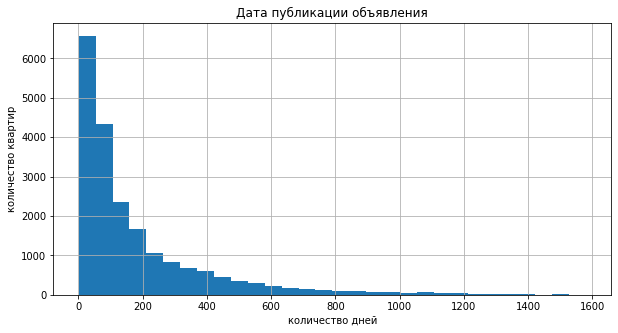

In [21]:
df['days_exposition'].hist(bins=30, figsize=(10, 5))
plt.title('Дата публикации объявления')
plt.xlabel('количество дней')
plt.ylabel('количество квартир')
plt.show()

##### Жилая площадь - living_area

Проверим как выглядят строки с неуказанной жилой площадью. 

In [22]:
df[df['living_area'].isna()].sort_values(by='total_area')

,total_images,first_day_exposition,days_exposition,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,balcony,is_apartment,studio,open_plan,locality_name,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
17961,3,2017-12-03,410.0,1400000.0,13.00,NaN,NaN,1,2.60,9.0,1,NaN,NaN,False,False,Санкт-Петербург,15945.0,14350.0,0.0,NaN,1.0,185.0
19546,3,2019-03-11,24.0,1850000.0,13.00,NaN,NaN,1,3.40,5.0,2,NaN,False,False,False,Санкт-Петербург,5483.0,24915.0,1.0,644.0,0.0,NaN
19558,2,2018-12-17,19.0,1686000.0,13.20,NaN,NaN,1,NaN,5.0,1,NaN,NaN,False,False,Санкт-Петербург,4165.0,19891.0,1.0,361.0,1.0,155.0
16949,9,2018-08-21,42.0,1550000.0,15.00,NaN,NaN,1,2.70,9.0,1,NaN,NaN,False,False,Санкт-Петербург,16376.0,51048.0,0.0,NaN,1.0,1079.0
12040,5,2018-06-27,45.0,1900000.0,15.00,NaN,NaN,1,2.50,5.0,1,NaN,NaN,False,False,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3676,12,2019-01-23,NaN,28789000.0,441.98,NaN,35.05,4,NaN,6.0,6,NaN,NaN,False,False,Санкт-Петербург,5181.0,20552.0,0.0,NaN,0.0,NaN
9826,1,2017-05-12,5.0,43185328.0,494.10,NaN,NaN,1,2.85,12.0,3,0.0,NaN,False,False,Санкт-Петербург,6832.0,28529.0,1.0,592.0,0.0,NaN
15016,8,2016-01-13,303.0,150000000.0,500.00,NaN,NaN,4,3.20,7.0,7,0.0,NaN,False,False,Санкт-Петербург,6150.0,33058.0,3.0,209.0,3.0,531.0
5893,3,2017-05-31,50.0,230000000.0,500.00,NaN,40.00,6,NaN,7.0,7,0.0,NaN,False,False,Санкт-Петербург,5297.0,32440.0,0.0,NaN,2.0,198.0


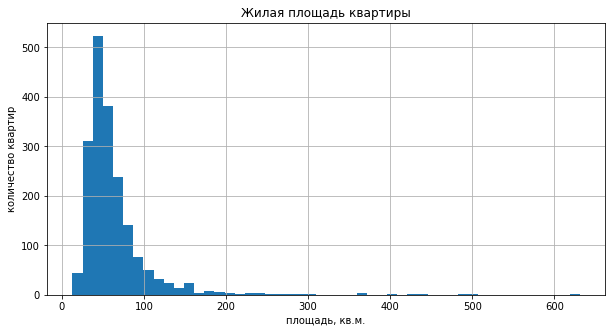

In [23]:
living_area_empty = df[df['living_area'].isna()]
living_area_empty['total_area'].hist(bins=50, figsize=(10, 5))  
plt.title('Жилая площадь квартиры')
plt.xlabel('площадь, кв.м.')
plt.ylabel('количество квартир')
plt.show()

Видим, что жилая площадь пропущена как в больших, так и в маленьких квартирах. Таких строк не более 2%. Оставим их без изменений.

##### Высота потолков - ceiling_height

In [24]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Почти половина высот потолков пропущена. Также видим нереалистичные минимальные и максимальные значения потолков 1 и 100 м, с ними разберемся на этапе поиска аномалий.

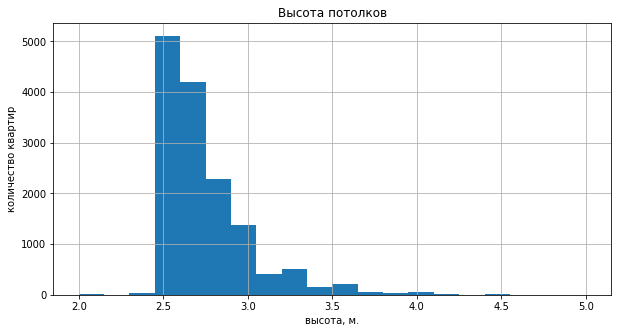

In [25]:
df['ceiling_height'].hist(bins=20, range=(2, 5), figsize=(10, 5))
plt.title('Высота потолков')
plt.xlabel('высота, м.')
plt.ylabel('количество квартир')
plt.show()

Наиболее популярные значения высот потолков 2,5 - 2,8 м. Заполним пустые значения медианой.

In [26]:
ceiling_median = df['ceiling_height'].median()

In [27]:
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_median)

##### Этажность - floors_total

Этажность дома не так важна, как этаж квартиры, к тому же пропущенных значений совсем немного. Заполним пропуски в этом столбце по этажу квартиры и переведем этажность домов в формат целых чисел, для удобства:

In [28]:
df.loc[:, 'floors_total'] = df.loc[:, 'floors_total'].fillna(df['floor'])
df['floors_total'] = df['floors_total'].astype('int')
df['floor'] = df['floor'].astype('int')

##### Апартаменты - is_apartment

Столбец с апартаментами имеет много пропусков, поэтому не определен как булев тип. Заполним его, а заодно изменим тип.
Только 50 владельцев из 23699 уверенно назвали квартиры апартаментами. Это соотношение похоже на правду. Заполним отсутствующие значения на False.

In [29]:
df.loc[:, 'is_apartment'] = df.loc[:, 'is_apartment'].fillna(False)
display(df['is_apartment'].value_counts())

False    23649
True        50
Name: is_apartment, dtype: int64

##### Балконы - balcony

In [30]:
df['balcony'] = df['balcony'].astype('Int64')
df['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [31]:
df['balcony'].unique()

<IntegerArray>
[<NA>, 2, 0, 1, 5, 4, 3]
Length: 7, dtype: Int64

Половина значений балконов незаполнено, эти данные мы уже не сможем получить или вывести логически. Заменим пропуски на 0, то есть отсутстсвие балконов.

In [32]:
df.loc[:, 'balcony'] = df.loc[:, 'balcony'].fillna(0)

In [33]:
df['balcony'] = df['balcony'].astype('int')

##### Населенный пункт - locality_name

In [34]:
df['locality_name'].isna().sum()

49

Всего 40 пропущенных значений населенных пунктов, эти данные - очень важный параметр в описании квартиры. Строк совсем немного, удалим их.

In [35]:
df = df.dropna(subset=['locality_name'])

##### Близость к аэропорту - airports_nearest

Для удобства переведем расстояния в киллометры и округлим до целых:

In [36]:
df['airports_nearest'] = df['airports_nearest'] // 1000
df['airports_nearest'] = df['airports_nearest'].astype('Int64')

Посмотрим пропущенные значения по городам.

In [37]:
airports_nearest_empty = df[df['airports_nearest'].isna()]
airports_nearest_empty['locality_name'].value_counts().head(30)

 Мурино             554
Всеволожск          398
Гатчина             307
 Кудрово            299
Выборг              237
Кудрово             173
 Новое Девяткино    144
Сертолово           142
Кириши              125
 Бугры              114
Сланцы              112
Волхов              111
Кингисепп           104
Тосно               104
Никольское           93
Коммунар             89
Сосновый Бор         87
Санкт-Петербург      85
Кировск              84
Отрадное             80
 Янино-1             68
Приозерск            66
 Старая              64
Шлиссельбург         57
Луга                 56
Тихвин               49
 Тельмана            41
 Рощино              39
 имени Свердлова     36
Волосово             36
Name: locality_name, dtype: int64

Пропуски распредлены между различными населенными пунктами, почти все в малых населенных пунктах. Оставим их как есть.

##### Расстояние до центра города - city_centers_nearest

In [38]:
df[df['city_centers_nearest'].isna()]

,total_images,first_day_exposition,days_exposition,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,balcony,is_apartment,studio,open_plan,locality_name,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
5,10,2018-09-10,55.0,2890000.0,30.40,14.40,9.10,1,2.65,12,5,0,False,False,False,Янино-1,NaN,<NA>,NaN,NaN,NaN,NaN
8,20,2018-05-23,189.0,2900000.0,33.16,15.43,8.81,1,2.65,27,26,0,False,False,False,Мурино,NaN,<NA>,NaN,NaN,NaN,NaN
12,10,2016-06-30,90.0,3890000.0,54.00,30.00,9.00,2,2.65,5,5,0,False,False,False,Сертолово,NaN,<NA>,NaN,NaN,NaN,NaN
22,20,2017-04-24,60.0,5000000.0,58.00,30.00,11.00,2,2.75,25,15,2,False,False,False,Кудрово,NaN,<NA>,NaN,NaN,NaN,NaN
30,12,2018-02-19,63.0,2200000.0,32.80,NaN,NaN,1,2.65,9,2,0,False,False,False,Коммунар,NaN,<NA>,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2018-09-18,NaN,2100000.0,62.80,45.50,5.50,4,2.50,5,3,0,False,False,False,Дзержинского,NaN,<NA>,NaN,NaN,NaN,NaN
23692,2,2017-07-07,413.0,1350000.0,30.00,17.50,6.00,1,2.65,5,4,0,False,False,False,Тихвин,NaN,<NA>,NaN,NaN,NaN,NaN
23695,14,2018-01-15,45.0,3100000.0,59.00,38.00,8.50,3,2.65,5,4,0,False,False,False,Тосно,NaN,<NA>,NaN,NaN,NaN,NaN
23696,18,2018-02-11,NaN,2500000.0,56.70,29.70,NaN,2,2.65,3,1,0,False,False,False,Рождествено,NaN,<NA>,NaN,NaN,NaN,NaN


Посмотрим пропущенные значения по городам.

In [39]:
center_empty = df[df['city_centers_nearest'].isna()]
center_empty['locality_name'].value_counts().head(30)

 Мурино             554
Всеволожск          398
Гатчина             307
 Кудрово            299
Выборг              237
Кудрово             173
 Новое Девяткино    144
Сертолово           142
Кириши              125
 Бугры              114
Сланцы              112
Волхов              111
Кингисепп           104
Тосно               104
Никольское           93
Коммунар             89
Сосновый Бор         87
Кировск              84
Отрадное             80
 Янино-1             68
Приозерск            66
 Старая              64
Санкт-Петербург      61
Шлиссельбург         57
Луга                 56
Тихвин               49
 Тельмана            41
 Рощино              39
 имени Свердлова     36
Волосово             36
Name: locality_name, dtype: int64

Пропуски распределены почти по тем же населенными пунктами, в которых есть пропуски в расстоянии до аэропорта. Мы также не можем заполнить их и оставим как есть.

Это относится и к остальным картографическим данным, такие как расстояние до парков и прудов.

##### Пояснения к пропущенным значениям: 

- такие значения, как высоты потолков, жилая площадь, площадь кухни, тип квартиры и планировки - хозяин квартиры может не знать (не понимать), запрос некоторых данных из БТИ или УК занимает время, поэтому их просто не указывают.
- пропуски в количестве балконов скорее всего означают их отстуствие.
- пропуски в названиях населенных пунктов сложно объяснить, скорее всего это невнимательность или некорректное заполнение формы, поскольку таких пропусков очень мало, и все они имеют различные параметры - удаленность от центра, площадь, цену и тип.
- удаленность до аэропорта и удаленность до центра чаще всего пропущены в мелких населенных пунктах, скорее всего там эта информация не важна или не корректна и ее могут просто не указывать. Такого рода информация может размещаться в дополнительном поле, не обязательном для заполнения. 
- наличие парков в мелких населенных пунктах, которые окружают леса и поля, также не корректны, поэтому даную информацию могут не указывать.
- пропуски в количестве дней размещения могут быть связаны с техническими моментами, например: объявление не было закрыто в момент получения датафрейма, или произошла ошибка в снятии этой метрики (объявление было удалено, а не закрыто, или подано несколько раз и т.п.) 


##### Проверка заполненных значений:

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   first_day_exposition  23650 non-null  datetime64[ns]
 2   days_exposition       20470 non-null  float64       
 3   last_price            23650 non-null  float64       
 4   total_area            23650 non-null  float64       
 5   living_area           21752 non-null  float64       
 6   kitchen_area          21381 non-null  float64       
 7   rooms                 23650 non-null  int64         
 8   ceiling_height        23650 non-null  float64       
 9   floors_total          23650 non-null  int64         
 10  floor                 23650 non-null  int64         
 11  balcony               23650 non-null  int64         
 12  is_apartment          23650 non-null  bool          
 13  studio          

Заполнили высоты потолков, этажность, апартаменты, балконы.  
Картографические данные не изменены.

#### АНОМАЛИИ

##### Стоимость квартиры - last_price

Пройдемся по основным столбцам и проверим есть ли аномальные значения.

In [41]:
df['last_price'].describe().round()

count        23650.0
mean       6541127.0
std       10896399.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6799000.0
max      763000000.0
Name: last_price, dtype: float64

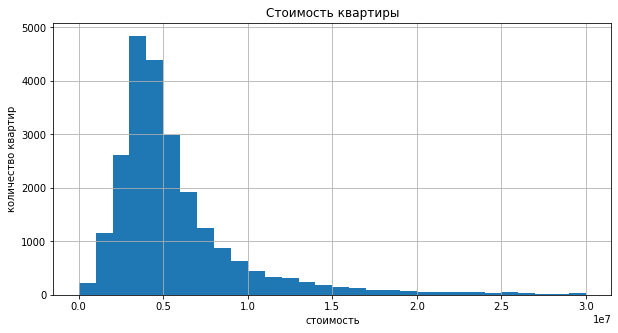

In [42]:
df['last_price'].hist(bins=30, range=(0, 30000000), figsize=(10, 5))
plt.title('Стоимость квартиры')
plt.xlabel('стоимость')
plt.ylabel('количество квартир')
plt.show()

In [43]:
df[df['last_price'] < 500000]

,total_images,first_day_exposition,days_exposition,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,balcony,is_apartment,studio,open_plan,locality_name,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
5698,7,2017-07-31,233.0,450000.0,42.0,23.0,5.8,2,2.65,1,1,0,False,False,False,Будогощь,NaN,<NA>,NaN,NaN,NaN,NaN
6859,6,2017-12-11,43.0,490000.0,40.0,NaN,NaN,1,2.65,5,3,0,False,False,False,Старополье,NaN,<NA>,NaN,NaN,NaN,NaN
8793,7,2019-03-20,8.0,12190.0,109.0,32.0,40.5,2,2.75,25,25,0,False,False,False,Санкт-Петербург,9176.0,36,1.0,805.0,0.0,NaN
9581,7,2018-08-31,96.0,450000.0,43.4,30.3,5.5,2,2.65,5,3,0,False,False,False,Старополье,NaN,<NA>,NaN,NaN,NaN,NaN
10782,3,2016-05-05,719.0,490000.0,29.1,17.0,5.5,1,2.50,5,5,0,False,False,False,Сланцы,NaN,<NA>,NaN,NaN,NaN,NaN
14911,5,2018-06-26,44.0,430000.0,54.0,NaN,NaN,2,2.65,3,3,0,False,False,False,Свирь,NaN,<NA>,NaN,NaN,NaN,NaN
16032,8,2019-01-06,83.0,480000.0,32.0,16.0,NaN,1,2.65,2,1,0,False,False,False,Сланцы,NaN,<NA>,NaN,NaN,NaN,NaN
16219,14,2018-07-11,45.0,450000.0,38.5,NaN,NaN,2,2.65,2,1,0,False,False,False,Вахнова Кара,NaN,<NA>,NaN,NaN,NaN,NaN
16274,18,2018-07-10,45.0,440000.0,40.0,NaN,NaN,1,2.65,5,1,0,False,False,False,Старополье,NaN,<NA>,NaN,NaN,NaN,NaN
17456,7,2019-04-22,NaN,430000.0,30.4,16.0,6.0,1,2.65,2,1,0,False,False,False,Сланцы,NaN,<NA>,NaN,NaN,NaN,NaN


Квартир за 12 000 не бывает, удалим эту строку. Больше подозрительно дешевых квартир нет.  
Проверим очень дорогие квартиры, метр которых стоит более 600 000.


In [44]:
rich_flats = df.query('last_price / total_area > 600000').sort_values(by='last_price')
display(rich_flats)

,total_images,first_day_exposition,days_exposition,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,balcony,is_apartment,studio,open_plan,locality_name,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
21238,1,2018-06-27,44.0,24412900.0,38.12,16.83,10.7,1,2.65,10,4,1,False,False,False,Всеволожск,NaN,<NA>,NaN,NaN,NaN,NaN
4859,16,2019-04-29,NaN,28000000.0,33.00,NaN,NaN,1,3.50,5,2,0,False,False,False,Санкт-Петербург,1376.0,23,3.0,344.0,3.0,119.0
17172,14,2019-04-30,NaN,28000000.0,33.00,NaN,NaN,1,3.50,5,2,0,False,False,False,Санкт-Петербург,1462.0,23,3.0,342.0,3.0,27.0
8322,20,2017-10-26,NaN,39900000.0,55.30,35.00,8.0,1,3.05,6,4,4,False,False,False,Санкт-Петербург,2136.0,25,1.0,72.0,3.0,202.0
6127,13,2017-07-13,497.0,40000000.0,65.30,45.00,12.0,2,4.10,5,2,2,False,False,False,Санкт-Петербург,2380.0,23,1.0,473.0,1.0,283.0
6462,2,2015-12-17,651.0,82000000.0,114.00,78.50,20.0,3,2.65,5,4,0,False,False,False,Санкт-Петербург,3400.0,22,2.0,218.0,3.0,69.0
16590,10,2017-12-16,90.0,98000000.0,155.00,NaN,NaN,3,2.65,8,6,0,False,False,False,Санкт-Петербург,5297.0,32,0.0,NaN,2.0,198.0
20264,17,2017-07-10,259.0,119000000.0,187.60,147.00,15.6,4,6.00,7,7,0,False,False,False,Санкт-Петербург,5605.0,26,3.0,484.0,1.0,305.0
16647,15,2017-04-25,335.0,122000000.0,145.00,36.00,72.0,3,3.30,6,2,0,False,False,False,Санкт-Петербург,7023.0,33,2.0,478.0,3.0,250.0
4996,20,2017-10-12,45.0,124000000.0,124.50,67.20,20.0,4,3.00,4,2,0,False,False,False,Санкт-Петербург,1722.0,20,3.0,302.0,3.0,172.0


Видно, что все кроме одной находятся в Санкт-Петербурге, недалеко от центра. Половина из них имеют большую площадь. А самые дорогие квартиры находятся в самом центре. В этих значениях нет ничего аномального, по крайней мере можем допустить, что существует небольшое количество дорогих квартир в центре Санкт-Петербурга. Оставим их.

Проверим стоимость квадратного метра дорогих квартир:

In [45]:
display((rich_flats['last_price'] / rich_flats['total_area']).round().sort_values())

16495     611538.0
6127      612557.0
16590     632258.0
20264     634328.0
21238     640422.0
7857      652174.0
19155     658436.0
2536      660000.0
8900      712201.0
6462      719298.0
8322      721519.0
17912     813253.0
16647     841379.0
17172     848485.0
4859      848485.0
16461     857543.0
4996      995984.0
14706    1000748.0
22831    1542605.0
1436     1736842.0
12971    1907500.0
dtype: float64

In [46]:
rich_flats.query('index == [22831, 1436, 12971]')

,total_images,first_day_exposition,days_exposition,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,balcony,is_apartment,studio,open_plan,locality_name,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
22831,18,2019-03-19,NaN,289238400.0,187.5,63.7,30.2,2,3.37,6,6,0,False,False,False,Санкт-Петербург,1073.0,22,3.0,386.0,3.0,188.0
1436,19,2018-04-04,233.0,330000000.0,190.0,95.0,40.0,3,3.50,7,5,0,False,False,False,Санкт-Петербург,1197.0,23,3.0,519.0,3.0,285.0
12971,19,2017-09-30,33.0,763000000.0,400.0,250.0,NaN,7,2.65,10,10,2,False,False,False,Санкт-Петербург,3956.0,25,1.0,530.0,3.0,756.0


По верхней цене за метр сильно выбиваются три квартиры. В первых двух случаях смущает количество комнат. В последнем - этаж. Удалим эти три строки, чтобы не искажать остальные данные. 

In [47]:
df = df.query('index != [22831, 1436, 12971]')

##### Общая площадь - total_area

In [48]:
df['total_area'].describe()

count    23647.000000
mean        60.303844
std         35.575988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

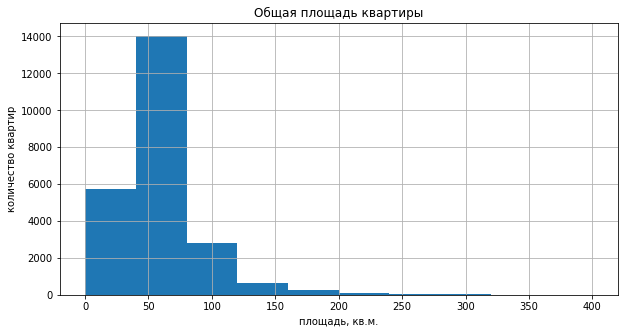

In [49]:
df['total_area'].hist(range=(0, 400), figsize=(10, 5))
plt.title('Общая площадь квартиры')
plt.xlabel('площадь, кв.м.')
plt.ylabel('количество квартир')
plt.show()

По стандарту минимальная площадь квартиры 28 кв.м. Если объект меньше, будем считать, что это комната и исключим такие строки  
(здесь стоит уточнить задачу, но по умолчанию будем считать, что задача провести анализ по квартирам)

In [50]:
df.query('total_area < 28').sort_values(by='total_area')

,total_images,first_day_exposition,days_exposition,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,balcony,is_apartment,studio,open_plan,locality_name,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
19904,4,2017-07-19,200.0,2400000.0,12.00,10.00,NaN,1,2.55,5,2,0,False,False,False,Санкт-Петербург,964.0,21,1.0,886.0,2.0,45.0
17961,3,2017-12-03,410.0,1400000.0,13.00,NaN,NaN,1,2.60,9,1,0,False,False,False,Санкт-Петербург,15945.0,14,0.0,NaN,1.0,185.0
19546,3,2019-03-11,24.0,1850000.0,13.00,NaN,NaN,1,3.40,5,2,0,False,False,False,Санкт-Петербург,5483.0,24,1.0,644.0,0.0,NaN
19807,0,2018-07-04,9.0,3800000.0,13.00,10.00,NaN,1,2.65,5,3,0,False,False,False,Санкт-Петербург,1242.0,21,1.0,592.0,3.0,27.0
19558,2,2018-12-17,19.0,1686000.0,13.20,NaN,NaN,1,2.65,5,1,0,False,False,False,Санкт-Петербург,4165.0,19,1.0,361.0,1.0,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10571,7,2017-11-04,114.0,2400000.0,27.80,19.60,NaN,1,2.65,25,22,0,False,False,False,Кудрово,NaN,<NA>,NaN,NaN,NaN,NaN
2846,4,2016-09-21,307.0,2325000.0,27.80,19.40,NaN,1,2.65,15,15,0,False,False,False,Санкт-Петербург,17369.0,22,0.0,NaN,1.0,374.0
6364,5,2018-08-09,131.0,2820000.0,27.81,17.85,NaN,0,2.70,25,5,0,False,True,False,Кудрово,NaN,<NA>,NaN,NaN,NaN,NaN
13997,13,2019-04-11,NaN,1000000.0,27.90,17.00,5.0,2,2.60,2,1,0,False,False,False,Ульяновка,NaN,<NA>,NaN,NaN,NaN,NaN


In [51]:
df = df.query('total_area >= 28')

In [52]:
df.query('total_area > 400').sort_values(by='total_area')

,total_images,first_day_exposition,days_exposition,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,balcony,is_apartment,studio,open_plan,locality_name,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
14706,15,2016-02-20,393.0,401300000.0,401.00,204.0,24.00,5,2.65,9,9,3,False,False,False,Санкт-Петербург,2389.0,21,1.0,545.0,1.0,478.0
14088,8,2017-02-07,32.0,51000000.0,402.00,300.0,56.00,6,3.15,8,6,2,False,False,False,Санкт-Петербург,5052.0,24,1.0,253.0,0.0,NaN
13749,7,2017-04-01,199.0,240000000.0,410.00,218.0,40.00,6,3.40,7,7,0,False,False,False,Санкт-Петербург,5297.0,32,0.0,NaN,2.0,198.0
14991,19,2018-09-20,182.0,45000000.0,413.50,74.2,13.90,7,2.65,20,18,0,False,False,False,Санкт-Петербург,4341.0,18,0.0,NaN,0.0,NaN
22131,14,2018-10-18,NaN,27000000.0,422.20,NaN,NaN,5,2.70,13,11,0,False,False,False,Санкт-Петербург,16554.0,46,0.0,NaN,0.0,NaN
21955,19,2017-10-02,161.0,130000000.0,431.00,220.0,20.00,7,3.70,8,5,5,False,False,False,Санкт-Петербург,NaN,<NA>,NaN,NaN,NaN,NaN
3676,12,2019-01-23,NaN,28789000.0,441.98,NaN,35.05,4,2.65,6,6,0,False,False,False,Санкт-Петербург,5181.0,20,0.0,NaN,0.0,NaN
20273,12,2019-03-20,21.0,20000000.0,460.80,279.6,55.50,6,3.10,3,1,0,False,False,False,Санкт-Петербург,15459.0,43,1.0,852.0,3.0,122.0
6221,8,2018-01-14,179.0,34000000.0,470.30,248.7,40.00,4,2.65,3,3,0,False,False,False,Санкт-Петербург,15459.0,43,1.0,852.0,3.0,122.0
660,3,2017-10-04,391.0,49950000.0,483.90,312.5,26.40,7,3.20,6,4,0,False,False,False,Санкт-Петербург,945.0,23,3.0,461.0,3.0,22.0


Удалим огромную квартиру с одной комнатой. Также удалим квартиру, площадью 900 кв.м., поскольку она сильно выбивается от верхней границы (хотя особых аномалий в ней нет).Три квартиры площадью более 400 кв.м. вызвали сомнение из-за цены за метр ниже 70000, но по остальным признакам аномалий нет.

In [53]:
df = df.query('index != [9826, 19540]') 

##### Потолки  - ceiling_height

Посмотрим крайние значения высот потолков:

In [54]:
df['ceiling_height'].describe()

count    23253.000000
mean         2.719841
std          0.750078
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

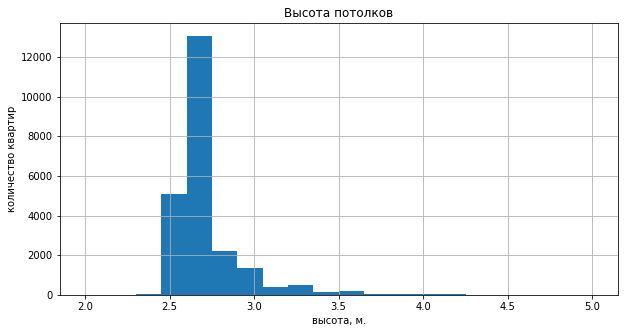

In [55]:
df['ceiling_height'].hist(bins=20, range=(2, 5), figsize=(10, 5))
plt.title('Высота потолков')
plt.xlabel('высота, м.')
plt.ylabel('количество квартир')
plt.show()

Наиболее популярные значения высот это 2,5 - 2,8 м. Не бывает квартир ниже 2.3 м. И допускаем двухуровневые квартиры высотой до 8 м. Проверим крайние значения:

In [56]:
df.query('ceiling_height < 2.3')

,total_images,first_day_exposition,days_exposition,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,balcony,is_apartment,studio,open_plan,locality_name,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
552,11,2017-03-30,270.0,2999000.0,33.50,17.500000,6.50,1,2.00,15,6,0,False,False,False,Санкт-Петербург,11746.0,33,1.0,520.0,1.0,949.0
2572,4,2018-12-27,NaN,2400000.0,62.00,40.000000,6.00,3,2.00,5,4,1,False,False,False,Луга,NaN,<NA>,NaN,NaN,NaN,NaN
4212,1,2017-12-18,36.0,2120000.0,35.43,16.600000,8.80,1,2.00,18,9,2,False,False,False,Тосно,NaN,<NA>,NaN,NaN,NaN,NaN
5712,5,2017-08-14,248.0,1500000.0,42.80,27.500000,5.20,2,1.20,2,1,0,False,False,False,Мга,NaN,<NA>,NaN,NaN,NaN,NaN
5850,9,2018-05-29,100.0,1650000.0,35.50,NaN,NaN,1,2.00,5,5,0,False,False,False,Луга,NaN,<NA>,NaN,NaN,NaN,NaN
11352,4,2017-06-18,53.0,3300000.0,36.00,15.200000,10.10,1,2.00,17,12,0,False,False,False,Металлострой,26980.0,25,0.0,NaN,0.0,NaN
16446,6,2019-03-12,NaN,12300000.0,88.30,63.900000,12.00,3,2.00,5,2,0,False,False,False,Санкт-Петербург,7675.0,38,1.0,568.0,1.0,154.0
16884,0,2018-10-03,6.0,1500000.0,33.00,20.000000,6.00,1,2.00,5,5,0,False,False,False,Выборг,NaN,<NA>,NaN,NaN,NaN,NaN
16934,5,2017-10-17,71.0,4100000.0,40.00,17.400000,8.34,1,1.75,37,5,0,False,False,False,Санкт-Петербург,20444.0,18,0.0,NaN,3.0,80.0
17794,1,2016-05-12,45.0,2300000.0,58.60,44.100002,5.50,3,2.25,5,3,1,False,False,False,Бегуницы,NaN,<NA>,NaN,NaN,NaN,NaN


Предположим, что это ошибочная высота, поскольку остальные данные в этих строках нормальные. Изменим ее на минимальную встречаемую 2.3 метра.

In [57]:
df.loc[df['ceiling_height'] < 2.3, 'ceiling_height'] = 2.3

In [58]:
df.query('ceiling_height > 8').sort_values(by='ceiling_height')

,total_images,first_day_exposition,days_exposition,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,balcony,is_apartment,studio,open_plan,locality_name,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
5863,20,2018-08-15,14.0,5650000.0,45.0,19.3,8.3,1,8.3,16,14,1,False,False,False,Санкт-Петербург,10763.0,13,0.0,NaN,1.0,613.0
22309,20,2017-09-30,136.0,5300000.0,45.0,15.5,NaN,1,10.3,16,15,0,False,False,False,Санкт-Петербург,11936.0,36,2.0,440.0,2.0,450.0
15061,19,2018-05-11,315.0,5600000.0,56.4,32.4,9.1,2,14.0,14,5,2,False,False,False,Санкт-Петербург,13610.0,14,0.0,NaN,0.0,NaN
17496,15,2019-02-19,NaN,6700000.0,92.9,53.2,12.0,3,20.0,17,14,5,False,False,False,Санкт-Петербург,15092.0,16,1.0,967.0,0.0,NaN
20507,12,2018-02-19,40.0,5950000.0,60.0,35.0,13.0,2,22.6,14,11,1,False,False,False,Санкт-Петербург,12570.0,27,0.0,NaN,0.0,NaN
5076,0,2018-10-03,7.0,3850000.0,30.5,19.5,5.5,1,24.0,5,1,0,True,False,False,Санкт-Петербург,8389.0,29,3.0,397.0,1.0,578.0
355,17,2018-07-12,259.0,3600000.0,55.2,32.0,NaN,2,25.0,5,2,2,False,False,False,Гатчина,NaN,<NA>,NaN,NaN,NaN,NaN
18545,6,2019-03-18,12.0,3750000.0,43.0,29.0,NaN,2,25.0,5,3,0,False,False,False,Санкт-Петербург,8033.0,27,1.0,540.0,0.0,NaN
14382,9,2015-12-04,206.0,1700000.0,35.0,20.0,8.0,1,25.0,5,2,1,False,False,False,Новый Свет,NaN,<NA>,NaN,NaN,NaN,NaN
11285,0,2019-03-20,18.0,1950000.0,37.0,17.0,9.0,1,25.0,5,4,2,False,False,False,Луга,NaN,<NA>,NaN,NaN,NaN,NaN


Очень может быть, что в значениях от 25 до 32 стоит не тот порядок. Уменьшим их на 10 и получим реалистичную высоту потолков.  
В случаях меньше 23 изменим ее на 2.3 м.

In [59]:
df.loc[df['ceiling_height'] > 23, 'ceiling_height'] = df.query('ceiling_height > 23')['ceiling_height'] / 10

In [60]:
df.loc[df['ceiling_height'] > 8, 'ceiling_height'] = 2.3

Посмотрим квартиры с высокими потолками:

In [61]:
df[df['ceiling_height'] > 4].sort_values(by='ceiling_height')

,total_images,first_day_exposition,days_exposition,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,balcony,is_apartment,studio,open_plan,locality_name,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
1129,20,2018-09-28,110.0,6695000.0,36.9,22.0,7.2,1,4.06,5,2,0,False,False,False,Санкт-Петербург,2990.0,21,1.0,596.0,1.0,866.0
11239,19,2017-08-15,589.0,9998000.0,65.6,33.0,9.0,2,4.10,4,3,0,False,False,False,Санкт-Петербург,4269.0,24,0.0,NaN,1.0,682.0
6127,13,2017-07-13,497.0,40000000.0,65.3,45.0,12.0,2,4.10,5,2,2,False,False,False,Санкт-Петербург,2380.0,23,1.0,473.0,1.0,283.0
4892,4,2015-11-20,260.0,8600000.0,93.0,NaN,NaN,4,4.10,5,4,0,False,False,False,Санкт-Петербург,4434.0,24,1.0,518.0,0.0,NaN
15567,7,2017-11-10,126.0,15000000.0,117.3,NaN,NaN,3,4.14,4,4,0,False,False,False,Санкт-Петербург,3674.0,25,1.0,571.0,3.0,787.0
154,1,2018-11-06,38.0,8200000.0,80.0,44.2,12.2,3,4.15,3,2,0,False,False,False,Санкт-Петербург,3167.0,20,2.0,344.0,1.0,838.0
2639,17,2017-11-18,60.0,4850000.0,59.7,46.3,6.4,3,4.19,5,4,1,False,False,False,Санкт-Петербург,15468.0,42,0.0,NaN,0.0,NaN
2999,11,2017-12-12,78.0,4450000.0,36.0,18.0,8.0,1,4.19,5,1,0,False,False,False,Санкт-Петербург,4256.0,24,1.0,1077.0,3.0,690.0
20873,18,2018-09-17,NaN,11500000.0,113.5,44.2,21.7,3,4.20,7,6,1,False,False,False,Санкт-Петербург,291.0,21,2.0,472.0,2.0,94.0
19041,8,2016-11-25,775.0,23750000.0,124.0,67.0,26.0,3,4.20,6,2,0,False,False,False,Санкт-Петербург,1898.0,23,3.0,515.0,3.0,264.0


Половина квартир с высокими потолками имеют очень большую площадь. Это похоже на правду. Но последние три значения 8 м в маленьких квартирах, две из которых находятся в селе. Удалим эти строки как сомнительные.

In [62]:
df = df.loc[df['ceiling_height'] != 8]

In [63]:
print(df['ceiling_height'].min(), df['ceiling_height'].max())

2.3 6.0


##### Площадь кухни - kitchen_area

In [64]:
df['kitchen_area'].describe()

count    21280.000000
mean        10.581682
std          5.857489
min          1.300000
25%          7.000000
50%          9.200000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

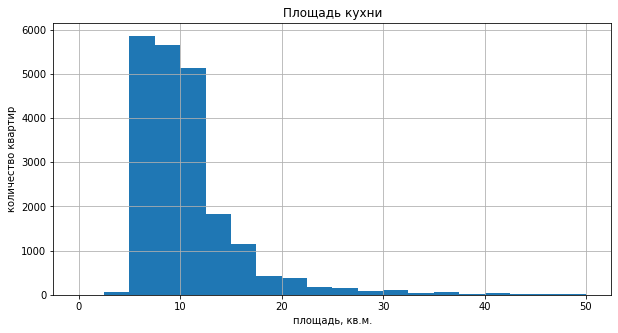

In [65]:
df['kitchen_area'].hist(bins=20,  range=(0, 50), figsize=(10, 5))
plt.title('Площадь кухни')
plt.xlabel('площадь, кв.м.')
plt.ylabel('количество квартир')
plt.show()

Посмотрим на крайние значения площадей кухонь:

In [66]:
df[df['kitchen_area'] > 50].sort_values(by='kitchen_area')

,total_images,first_day_exposition,days_exposition,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,balcony,is_apartment,studio,open_plan,locality_name,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
20636,10,2017-08-19,101.0,13500000.0,135.0,52.40,50.2,3,3.00,12,11,1,False,False,False,Санкт-Петербург,6303.0,16,1.0,156.0,0.0,NaN
20314,8,2017-04-09,9.0,42000000.0,374.0,239.40,51.0,7,2.65,4,3,0,False,False,False,Пушкин,27749.0,15,3.0,62.0,3.0,274.0
6021,19,2019-04-04,NaN,16830000.0,117.4,33.40,51.0,2,2.75,16,13,2,False,False,False,Санкт-Петербург,14721.0,51,0.0,NaN,0.0,NaN
8709,19,2017-04-20,159.0,24500000.0,105.0,31.10,51.0,2,3.20,6,2,0,False,False,False,Санкт-Петербург,3310.0,24,2.0,445.0,0.0,NaN
11723,18,2015-01-15,725.0,32500000.0,127.1,56.20,51.8,3,3.40,6,2,0,False,False,False,Санкт-Петербург,318.0,21,2.0,160.0,3.0,569.0
20499,15,2017-02-07,298.0,20950000.0,152.0,70.00,53.0,4,3.30,4,4,0,False,False,False,Санкт-Петербург,4344.0,24,1.0,633.0,0.0,NaN
19382,9,2018-07-16,5.0,20786000.0,109.0,NaN,53.0,2,3.00,7,4,0,False,False,False,Санкт-Петербург,4850.0,24,2.0,335.0,0.0,NaN
8559,20,2017-11-20,146.0,48000000.0,203.3,104.20,53.1,7,3.30,6,3,0,False,False,False,Санкт-Петербург,3868.0,25,1.0,341.0,0.0,NaN
19977,16,2018-03-28,90.0,33000000.0,283.3,99.00,54.0,5,2.65,3,3,0,False,False,False,Санкт-Петербург,13644.0,38,0.0,NaN,0.0,NaN
17563,6,2017-10-07,72.0,24500000.0,167.5,83.60,54.2,3,2.65,6,6,1,False,False,False,Санкт-Петербург,2291.0,24,2.0,305.0,3.0,329.0


In [67]:
df[df['kitchen_area'] > 0.7 * df['total_area']].sort_values(by='kitchen_area')

,total_images,first_day_exposition,days_exposition,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,balcony,is_apartment,studio,open_plan,locality_name,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
11579,7,2016-05-13,180.0,4300000.0,33.0,26.0,26.0,1,2.65,16,14,0,False,False,False,Санкт-Петербург,12702.0,37,0.0,NaN,0.0,NaN
12481,8,2017-10-04,234.0,3000000.0,60.4,NaN,43.2,3,2.60,9,2,0,False,False,False,Коммунар,NaN,<NA>,NaN,NaN,NaN,NaN
511,7,2017-12-21,56.0,5950000.0,69.0,13.0,50.0,1,2.65,16,12,1,False,False,False,Мурино,NaN,<NA>,NaN,NaN,NaN,NaN


Квартиры, где кухня занимает половину площади, вызывают подозрение. Но можно предположить, что это кухни-гостиные.  
Квартир, где кухня занимает почти всю площадь не бывает. Удалим эти строки.

In [68]:
df = df.query('index != [11579, 12481, 511]')

Также, не бывает кухонь меньше 5 метров. Посмотрим эти строки.

In [69]:
pd.set_option('display.max_row', 80)
df[df['kitchen_area'] < 5].sort_values(by='kitchen_area')

,total_images,first_day_exposition,days_exposition,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,balcony,is_apartment,studio,open_plan,locality_name,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
20217,7,2019-05-01,NaN,4250000.0,28.50,19.50,1.30,1,2.80,14,10,0,False,False,False,Санкт-Петербург,12721.0,37,0.0,NaN,0.0,NaN
11033,6,2016-04-20,210.0,5350000.0,32.00,16.00,2.00,1,2.65,14,10,0,False,False,False,Санкт-Петербург,3953.0,19,0.0,NaN,1.0,69.0
17834,5,2017-10-09,318.0,2940000.0,34.70,15.50,2.30,1,2.65,26,14,1,False,False,False,Мурино,NaN,<NA>,NaN,NaN,NaN,NaN
7950,3,2017-02-07,335.0,5967734.0,66.40,44.40,2.89,2,2.65,4,2,0,False,False,False,Санкт-Петербург,20802.0,44,0.0,NaN,0.0,NaN
15014,19,2017-07-14,26.0,3350000.0,28.30,20.20,3.00,1,2.77,27,8,2,False,False,False,Санкт-Петербург,13871.0,32,0.0,NaN,1.0,505.0
13814,14,2017-08-24,64.0,3650000.0,28.00,18.00,3.00,1,2.60,19,10,2,False,False,False,Санкт-Петербург,16167.0,35,0.0,NaN,0.0,NaN
3078,17,2018-11-12,37.0,6000000.0,43.00,29.30,3.20,2,2.90,4,2,0,False,False,False,Санкт-Петербург,5247.0,22,1.0,319.0,2.0,831.0
14836,3,2018-02-01,196.0,3900000.0,45.00,28.40,3.30,2,3.00,1,1,0,False,False,False,Стрельна,23654.0,26,0.0,NaN,2.0,640.0
12595,9,2017-09-20,15.0,3700000.0,44.40,28.40,3.40,2,2.50,5,5,1,False,False,False,Санкт-Петербург,13609.0,41,0.0,NaN,0.0,NaN
14183,3,2017-08-24,237.0,5200000.0,47.00,36.00,3.50,2,3.30,4,3,0,False,False,False,Санкт-Петербург,2998.0,23,0.0,NaN,0.0,NaN


Мы видим, что площадь кухни уменьшается очень плавно, то есть это не единичные значения. Можно предположить, что в квартирах есть кухни-ниши - зоны, которые не ограничены стенами и существуют в общем пространстве гостиной. Тем не менее, лучше удалить варианты с площадью менее 4 кв.м. (14 строк)

In [70]:
df = df.query('kitchen_area > 4')

##### Комнаты - rooms

In [71]:
df['rooms'].describe()

count    21249.000000
mean         2.100146
std          1.061257
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [72]:
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6, 11,  7,  8, 14, 10, 15,  9, 19, 16])

In [73]:
df.query('rooms > 10')

,total_images,first_day_exposition,days_exposition,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,balcony,is_apartment,studio,open_plan,locality_name,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
648,3,2018-07-01,NaN,17500000.0,183.7,138.8,13.3,11,3.40,7,7,0,False,False,False,Санкт-Петербург,3148.0,23,0.0,NaN,0.0,NaN
866,5,2017-12-23,418.0,25000000.0,363.0,222.0,16.6,14,3.16,5,4,0,False,False,False,Санкт-Петербург,7950.0,38,0.0,NaN,2.0,435.0
5358,20,2019-02-14,14.0,65000000.0,590.0,409.0,100.0,15,3.50,6,3,0,False,False,False,Санкт-Петербург,4666.0,24,1.0,767.0,0.0,NaN
9688,8,2017-02-07,813.0,33000000.0,194.1,129.0,11.9,11,3.43,5,2,0,False,False,False,Санкт-Петербург,1015.0,21,1.0,686.0,2.0,66.0
14498,6,2018-06-09,114.0,32250000.0,374.6,264.5,27.6,19,2.65,5,2,0,False,False,False,Санкт-Петербург,3574.0,19,0.0,NaN,2.0,548.0
18848,6,2015-03-02,1365.0,28500000.0,270.0,180.0,13.0,16,3.00,4,4,1,False,False,False,Санкт-Петербург,4142.0,23,1.0,516.0,0.0,NaN
20829,6,2016-03-31,95.0,28659000.0,245.4,168.3,25.9,14,2.65,4,2,0,False,False,False,Санкт-Петербург,2054.0,21,3.0,541.0,2.0,118.0


Количество комнат совпадает с большой и очень большой площадью квартир. Аномалий нет.

In [74]:
df.query('rooms < 2 & total_area > 40').sort_values(by='total_area')

,total_images,first_day_exposition,days_exposition,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,balcony,is_apartment,studio,open_plan,locality_name,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
19535,12,2018-03-07,11.0,4950000.0,40.08,34.60,9.10,1,2.80,24,5,2,False,False,False,Санкт-Петербург,14240.0,15,1.0,157.0,0.0,NaN
16839,8,2018-03-04,159.0,3500000.0,40.10,19.15,11.81,1,2.65,15,10,1,False,False,False,Кудрово,NaN,<NA>,NaN,NaN,NaN,NaN
20533,9,2017-09-06,336.0,4600000.0,40.10,19.00,11.70,1,2.80,18,12,2,False,False,False,Санкт-Петербург,16921.0,44,0.0,NaN,0.0,NaN
5558,12,2017-07-14,649.0,4990000.0,40.10,20.70,10.50,1,2.75,16,15,0,False,False,False,Санкт-Петербург,12882.0,11,0.0,NaN,1.0,423.0
3332,3,2018-03-31,245.0,5500000.0,40.10,14.06,11.52,1,2.65,13,5,0,False,False,False,Санкт-Петербург,11487.0,35,0.0,NaN,3.0,363.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,13,2017-08-14,59.0,9300000.0,106.90,38.60,10.00,1,3.10,4,2,0,False,False,False,Санкт-Петербург,15759.0,44,1.0,769.0,3.0,61.0
14210,24,2017-08-17,5.0,43511000.0,122.08,35.20,26.00,1,2.65,7,1,0,False,False,False,Санкт-Петербург,5955.0,32,2.0,230.0,3.0,215.0
8261,20,2018-01-14,61.0,36000000.0,123.20,31.20,58.40,1,3.00,14,7,1,False,False,False,Санкт-Петербург,6800.0,28,2.0,84.0,3.0,234.0
13023,8,2018-09-09,4.0,11000000.0,127.30,55.50,14.80,1,3.10,5,4,0,False,False,False,Санкт-Петербург,2045.0,20,2.0,284.0,3.0,175.0


Есть много квартир с неправильно заполненным количеством комнат - всего 1 комната при площади 40-190 кв.м. Изменить эти значения на правильные невозможно, будем их иметь ввиду.

##### Проверка 

In [75]:
len(df)

21249

In [76]:
deleted_percent = int(100 - (21249 / 23699 * 100))
print(f'По итогу проверки на аномалии мы удалили {deleted_percent}% от всех строк датафрейма.')

По итогу проверки на аномалии мы удалили 10% от всех строк датафрейма.


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21249 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21249 non-null  int64         
 1   first_day_exposition  21249 non-null  datetime64[ns]
 2   days_exposition       18284 non-null  float64       
 3   last_price            21249 non-null  float64       
 4   total_area            21249 non-null  float64       
 5   living_area           20813 non-null  float64       
 6   kitchen_area          21249 non-null  float64       
 7   rooms                 21249 non-null  int64         
 8   ceiling_height        21249 non-null  float64       
 9   floors_total          21249 non-null  int64         
 10  floor                 21249 non-null  int64         
 11  balcony               21249 non-null  int64         
 12  is_apartment          21249 non-null  bool          
 13  studio          

In [78]:
df['parks_around_3km']

0        1.0
1        0.0
2        1.0
4        2.0
5        NaN
        ... 
23693    1.0
23694    1.0
23695    NaN
23697    2.0
23698    NaN
Name: parks_around_3km, Length: 21249, dtype: float64

In [79]:
len(df[df['parks_around_3km']==0])

9160

In [80]:
df.query('parks_around_3km>0')

,total_images,first_day_exposition,days_exposition,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,balcony,is_apartment,studio,open_plan,locality_name,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest
0,20,2019-03-07,NaN,13000000.0,108.00,51.0,25.00,3,2.70,16,8,0,False,False,False,Санкт-Петербург,16028.0,18,1.0,482.0,2.0,755.0
2,10,2015-08-20,558.0,5196000.0,56.00,34.3,8.30,2,2.65,5,4,0,False,False,False,Санкт-Петербург,13933.0,21,1.0,90.0,2.0,574.0
4,2,2018-06-19,121.0,10000000.0,100.00,32.0,41.00,2,3.03,14,13,0,False,False,False,Санкт-Петербург,8098.0,31,2.0,112.0,1.0,48.0
10,5,2017-11-16,137.0,5050000.0,39.60,20.3,8.50,1,2.67,12,3,0,False,False,False,Санкт-Петербург,13878.0,38,1.0,310.0,2.0,553.0
13,20,2017-07-01,366.0,3550000.0,42.80,27.0,5.20,2,2.56,5,5,1,False,False,False,Петергоф,33058.0,37,1.0,294.0,3.0,298.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,2018-02-28,29.0,3550000.0,35.30,16.3,9.10,1,2.86,15,4,2,False,False,False,Санкт-Петербург,16081.0,17,1.0,353.0,2.0,652.0
23690,3,2018-07-19,15.0,5500000.0,52.00,31.0,6.00,2,2.65,5,2,0,False,False,False,Санкт-Петербург,6263.0,20,1.0,300.0,0.0,NaN
23693,9,2016-08-05,239.0,4600000.0,62.40,40.0,8.00,3,2.60,9,8,0,False,False,False,Петергоф,34104.0,45,1.0,352.0,1.0,675.0
23694,9,2017-03-21,NaN,9700000.0,133.81,73.3,13.83,3,3.70,5,3,0,False,False,False,Санкт-Петербург,4232.0,24,1.0,796.0,3.0,381.0


### НОВЫЕ СТОЛБЦЫ

Цена одного квадратного метра:

In [81]:
df['price_sq_m'] = df['last_price'] // df['total_area']

Добавим день недели, месяц и год публикации объявления:

In [82]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

Добавим тип этажа квартиры - "первый", "последний", "другой":

In [83]:
def type_floor(df):
    if df['floor'] == 1:
        return 'первый'
    if 1 < df['floor'] < df['floors_total']:
        return 'другой'
    return 'последний'
df['type_floor'] = df.apply(type_floor, axis=1)

Переведем метры в километры и округлим до целых:

In [84]:
df['city_centers_nearest'] = df['city_centers_nearest'] // 1000
df['city_centers_nearest'] = df['city_centers_nearest'].astype('Int64')


Новые столбцы переместим в логичные места в датафрейме.

In [85]:
print(df.columns)

Index(['total_images', 'first_day_exposition', 'days_exposition', 'last_price',
       'total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height',
       'floors_total', 'floor', 'balcony', 'is_apartment', 'studio',
       'open_plan', 'locality_name', 'city_centers_nearest',
       'airports_nearest', 'parks_around_3km', 'parks_nearest',
       'ponds_around_3km', 'ponds_nearest', 'price_sq_m', 'weekday', 'month',
       'year', 'type_floor'],
      dtype='object')


In [86]:
df = df.reindex(columns=['total_images', 'first_day_exposition', 'days_exposition', 'last_price', 'price_sq_m',
       'total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height',
       'floors_total', 'floor', 'type_floor', 'balcony', 'is_apartment', 'studio',
       'open_plan', 'locality_name', 'city_centers_nearest',
       'airports_nearest', 'parks_around_3km', 'parks_nearest',
       'ponds_around_3km', 'ponds_nearest', 'weekday', 'month',
       'year'])

### ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ

##### Анализ осовных параметров

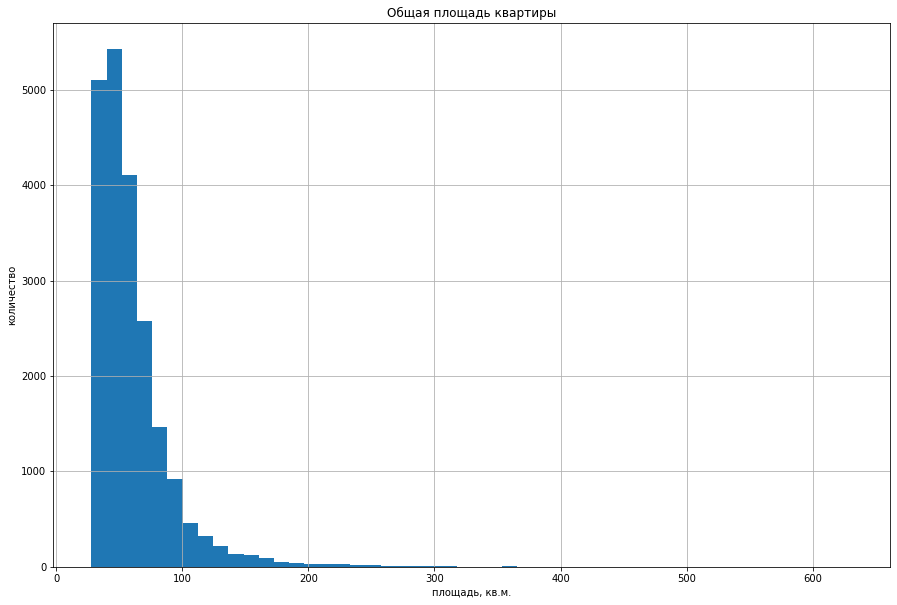

In [87]:
df.total_area.hist(bins=50, figsize=(15, 10))
plt.title('Общая площадь квартиры')
plt.xlabel('площадь, кв.м.')
plt.ylabel('количество')
plt.show()

Большинство квартир имеют площадь 30-60 кв.м. Есть малое количество огромных квартир площадью до 600 кв.м.

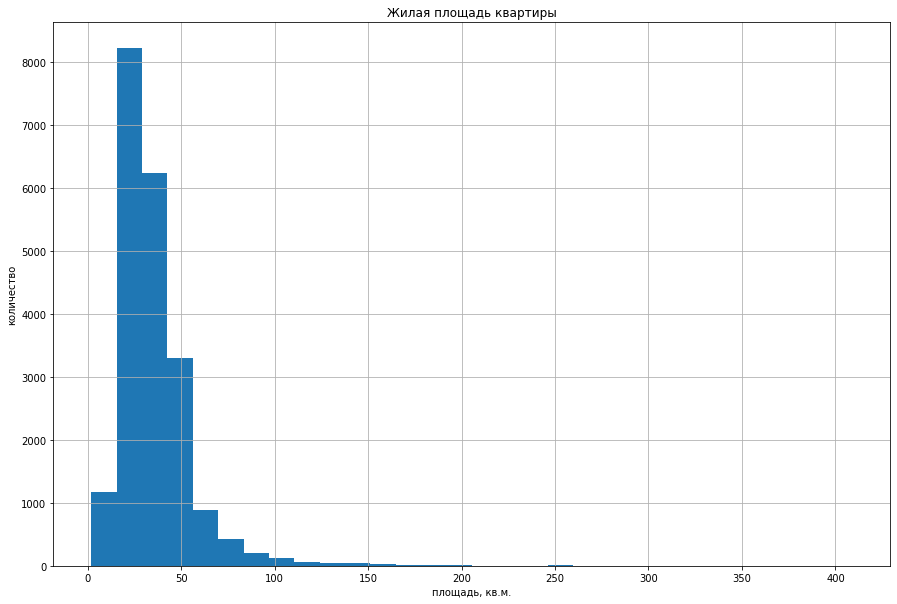

In [88]:
df.living_area.hist(bins=30, figsize=(15, 10))
plt.title('Жилая площадь квартиры')
plt.xlabel('площадь, кв.м.')
plt.ylabel('количество')
plt.show()

Гистограмма жилой площади повторяет гистограмму общей площади.

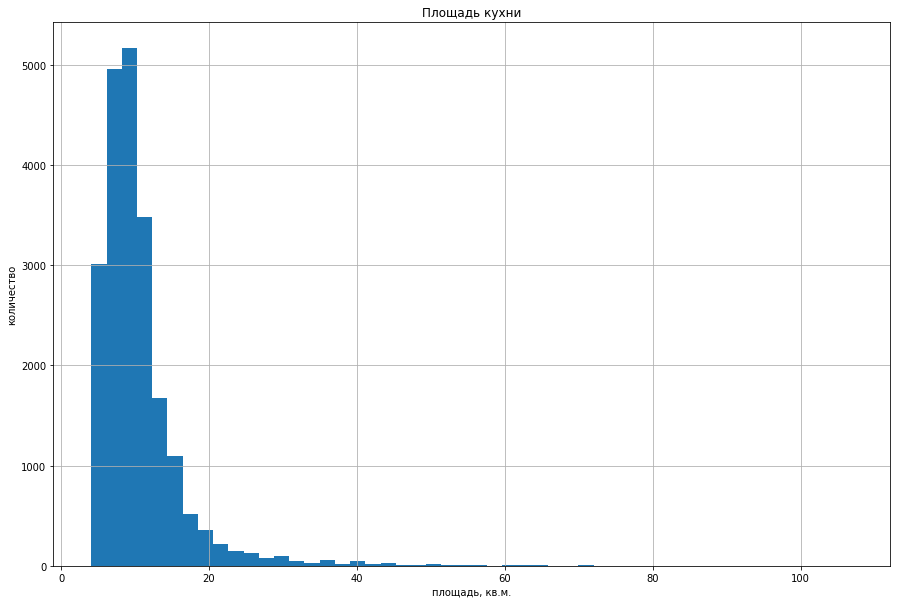

In [89]:
df.kitchen_area.hist(bins=50, figsize=(15, 10))
plt.title('Площадь кухни')
plt.xlabel('площадь, кв.м.')
plt.ylabel('количество')
plt.show()

Большинство кухонь имеют площадь 6-12 кв.м.

In [90]:
df['last_price_mln'] = df['last_price'] / 1000000
df['last_price_mln'] = df['last_price_mln'].apply(lambda x: round(x, 2))

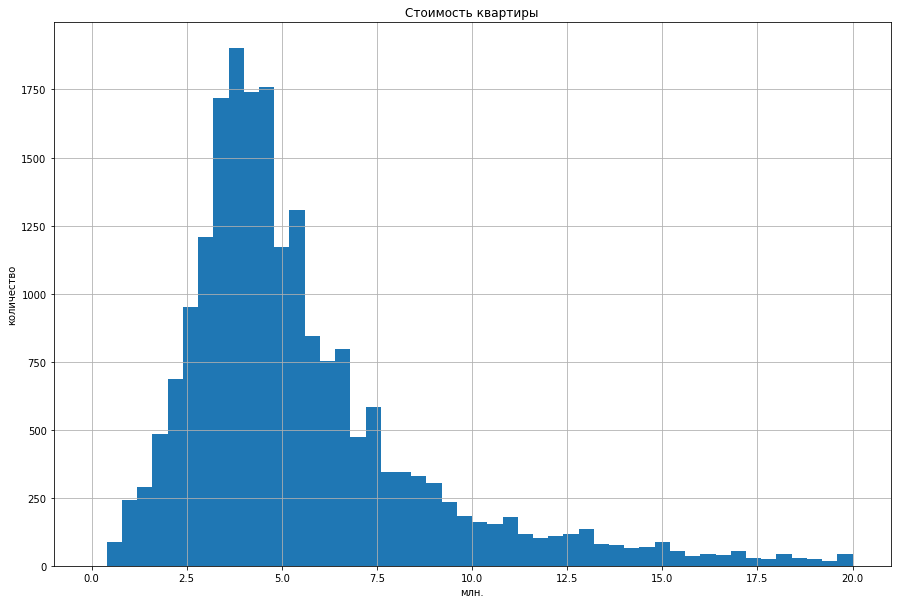

In [91]:
df.last_price_mln.hist(bins=50, range=(0, 20), figsize=(15, 10))
plt.title('Стоимость квартиры')
plt.xlabel('млн.')
plt.ylabel('количество')
plt.show()

Большинство квартир выставляются на продажу за 3-6 млн.

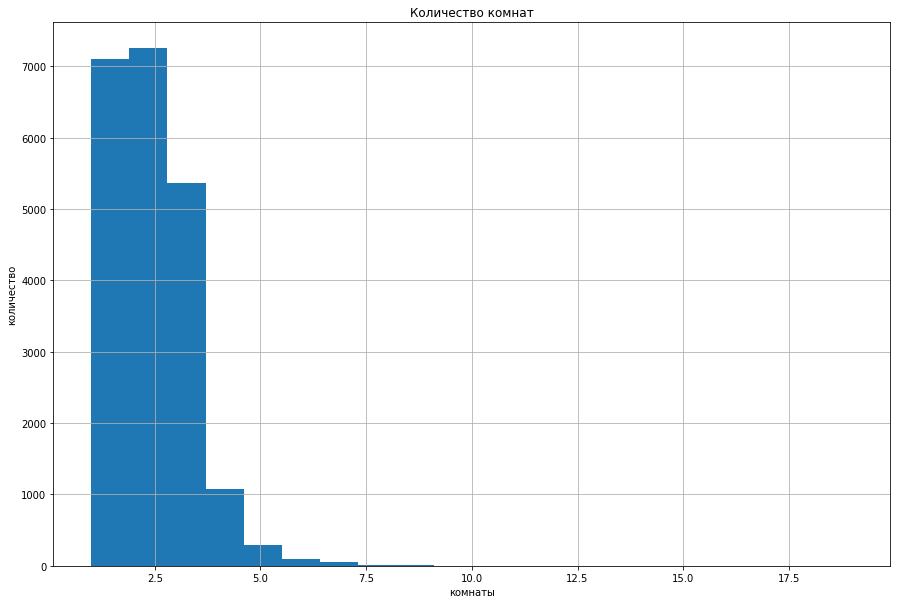

In [92]:
df.rooms.hist(bins=20, figsize=(15, 10))
plt.title('Количество комнат')
plt.xlabel('комнаты')
plt.ylabel('количество')
plt.show()

Большинство квартир 1-3 комнатные. 

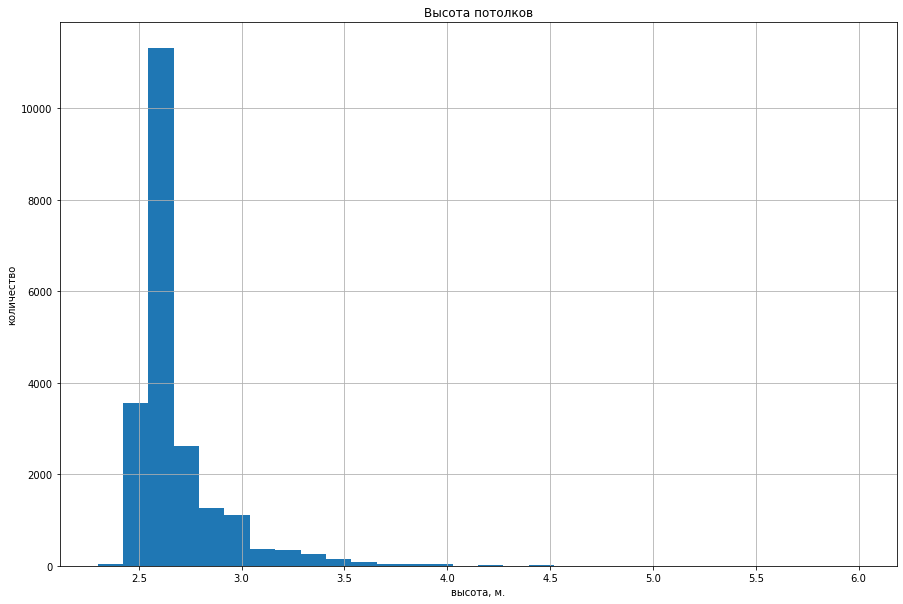

In [93]:
df.ceiling_height.hist(bins=30, figsize=(15, 10))
plt.title('Высота потолков')
plt.xlabel('высота, м.')
plt.ylabel('количество')
plt.show()

Наиболее популярная высота потолков 2,6 м.

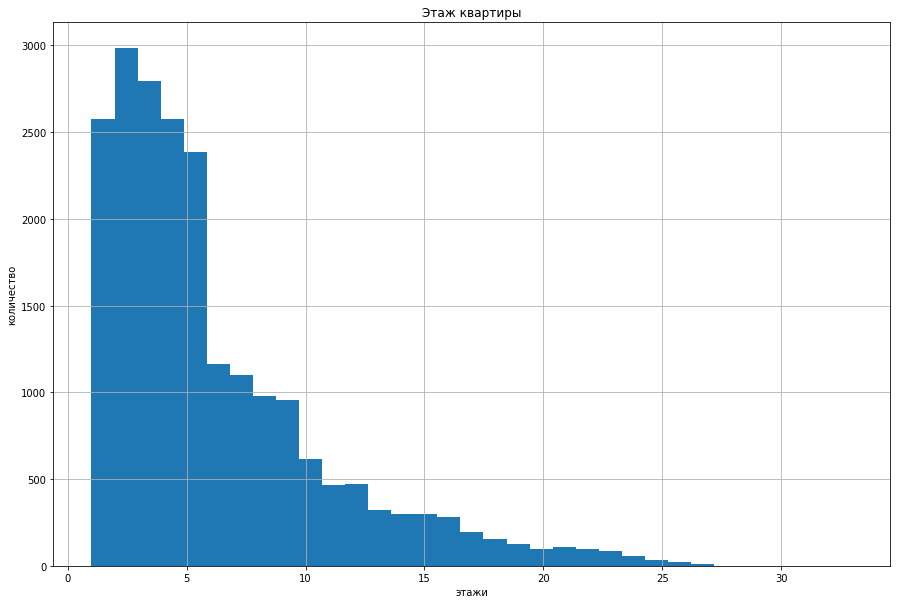

In [94]:
df.floor.hist(bins=33, figsize=(15, 10))
plt.title('Этаж квартиры')
plt.xlabel('этажи')
plt.ylabel('количество')
plt.show()

Большинство квартир расположены на низких этажах, 1-5 этажи самые часто встречаемые. Это можно объяснить большим количеством 5-ти этажных домов, что подтверждается на гистограмме ниже.

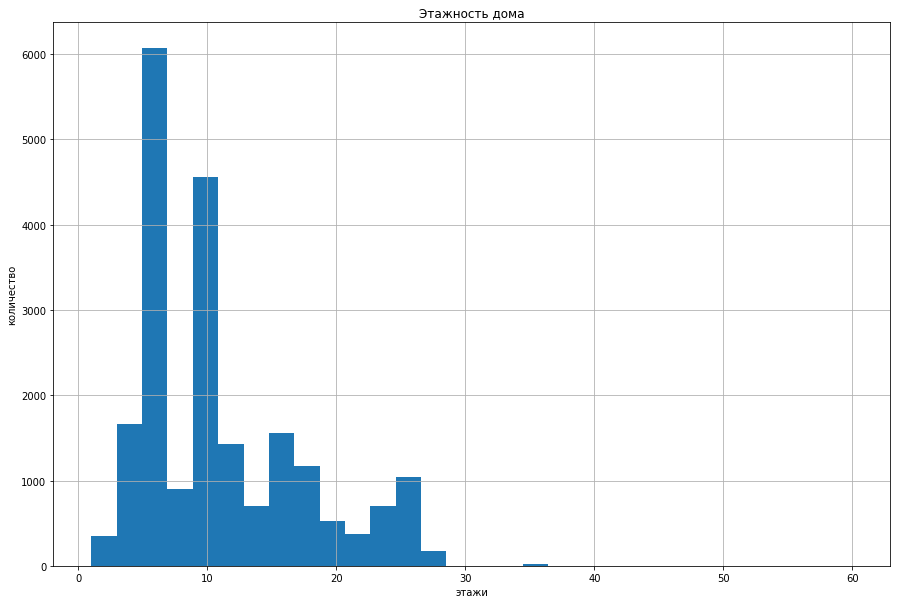

In [95]:
df.floors_total.hist(bins=30, figsize=(15, 10))
plt.title('Этажность дома')
plt.xlabel('этажи')
plt.ylabel('количество')
plt.show()

Большинство квартир находятся в 5 и 9 тажных домах.

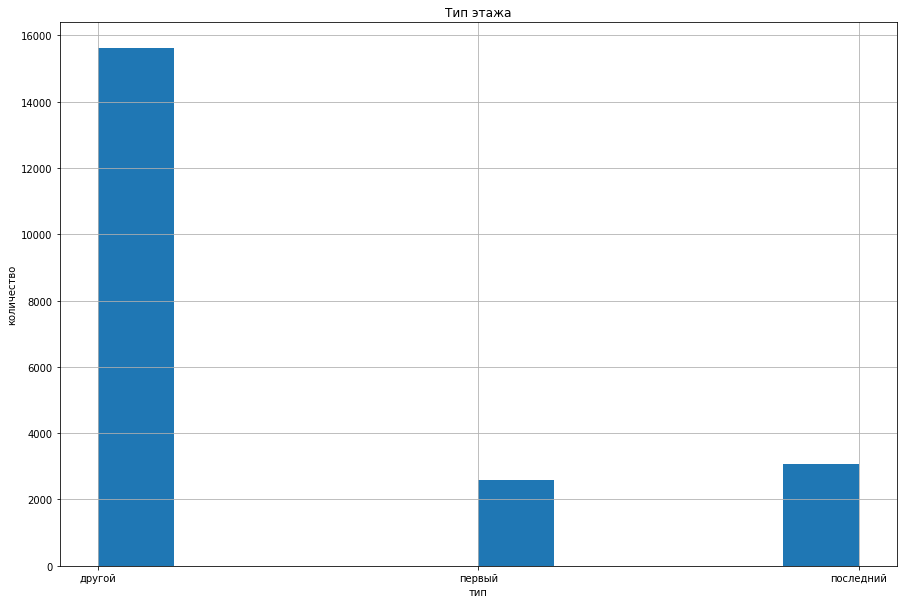

In [96]:
df.type_floor.hist(figsize=(15, 10))
plt.title('Тип этажа')
plt.xlabel('тип')
plt.ylabel('количество')
plt.show()

Квартиры на первых и последних этажах реже встречаются, чем на других.

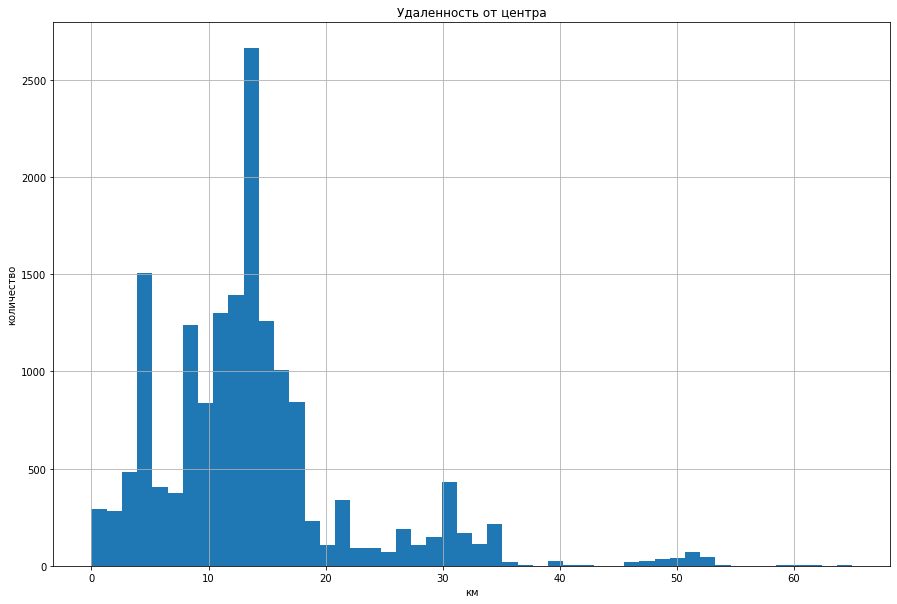

In [97]:
df.city_centers_nearest.hist(bins=50, figsize=(15, 10))
plt.title('Удаленность от центра')
plt.xlabel('км')
plt.ylabel('количество')
plt.show()

Чаще всего квартиры удалены от центра на 12-14 км, еще один пик - 4 км от центра.

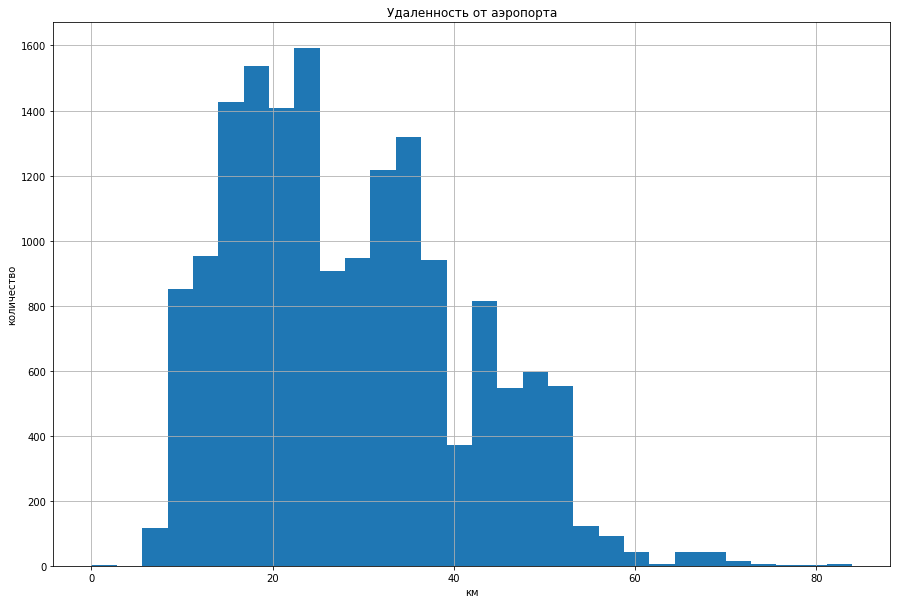

In [98]:
df.airports_nearest.hist(bins=30, figsize=(15, 10))
plt.title('Удаленность от аэропорта')
plt.xlabel('км')
plt.ylabel('количество')
plt.show()

Удаленность от ближайшего аэропорта очень разнообразная, от 15 до 43 км.

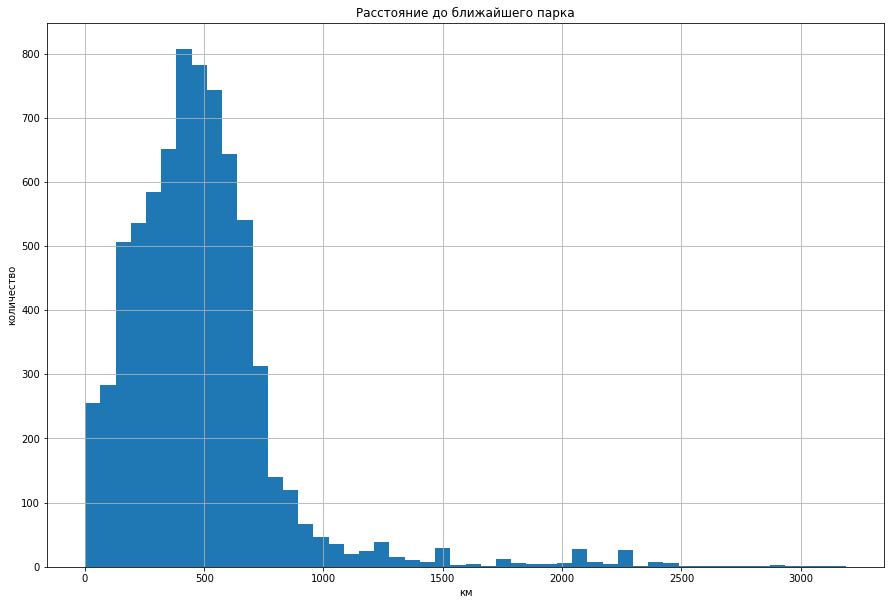

In [99]:
df.parks_nearest.hist(bins=50, figsize=(15, 10))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('км')
plt.ylabel('количество')
plt.show()

У большинства квартир есть парк в радиусе 200-700 метров.

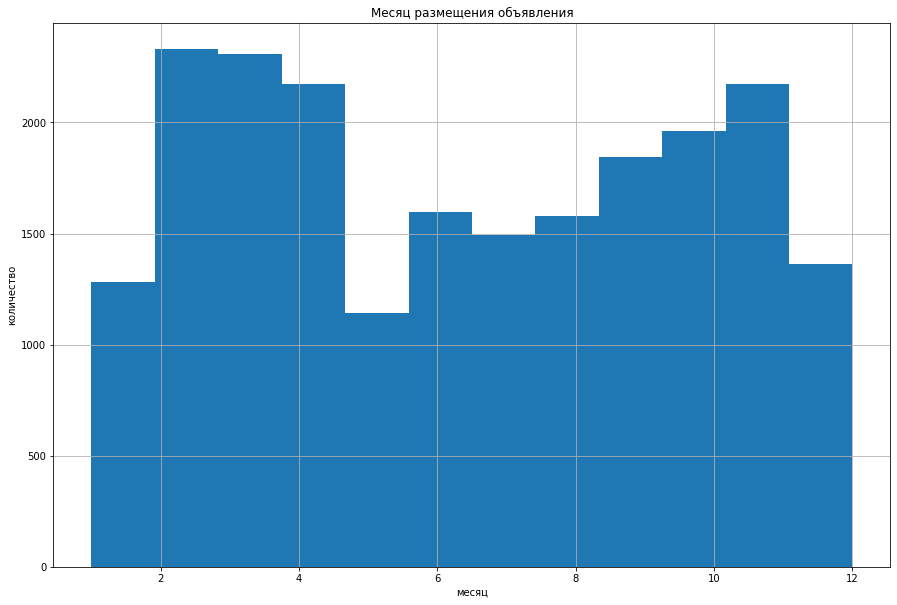

In [100]:
df.month.hist(bins=12, figsize=(15, 10))
plt.title('Месяц размещения объявления')
plt.xlabel('месяц')
plt.ylabel('количество')
plt.show()

Объявления чаще всего размещают весной и осенью. В мае, декабре и январе - меньше всего публикаций. Можно предположить, что это связано с дачным сезоном и новогодними праздниками.

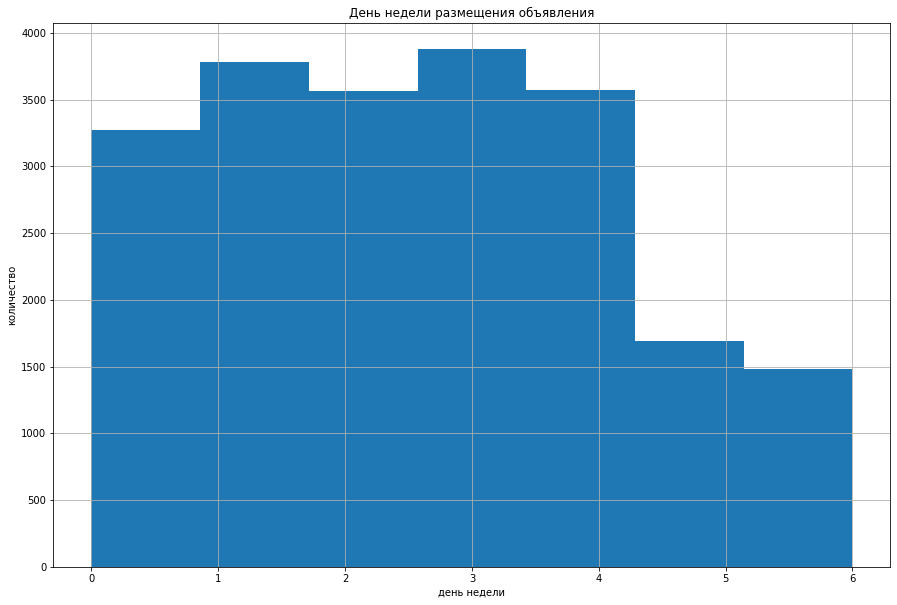

In [101]:
df.weekday.hist(bins=7, figsize=(15, 10))
plt.title('День недели размещения объявления')
plt.xlabel('день недели')
plt.ylabel('количество')
plt.show()

А в днях недели довльно неожиданный результат - в выходные выкладывают объявления реже всего. В остальные дни - почти равномерно, четверг и вторник лидируют.

##### Скорость продажи квартир

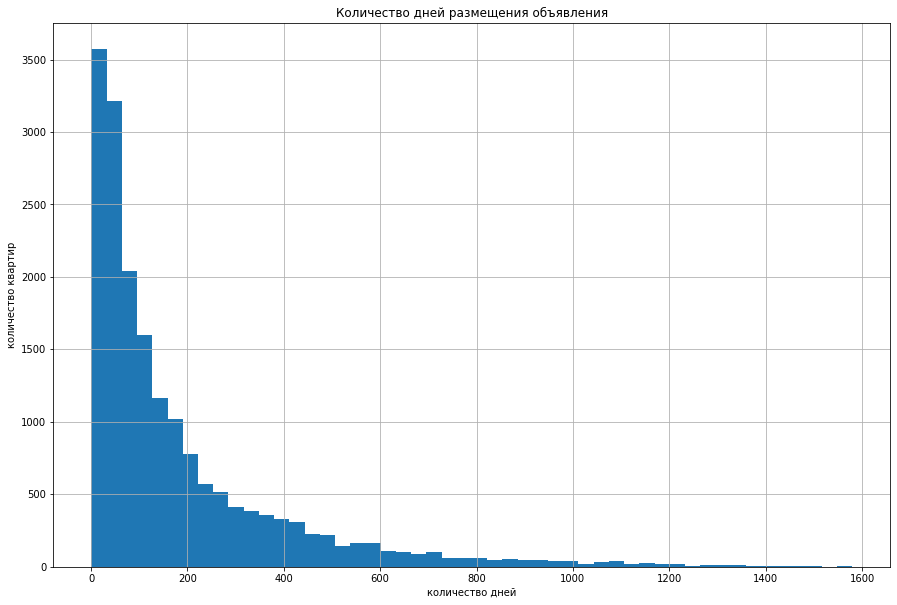

In [102]:
df.days_exposition.hist(bins=50, figsize=(15, 10))
plt.title('Количество дней размещения объявления')
plt.xlabel('количество дней')
plt.ylabel('количество квартир')
plt.show()

In [103]:
df.days_exposition.median()

102.0

In [104]:
df.days_exposition.mean().round()

186.0

Продажа квартиры в среднем занимает около 102 дней. Быстрыми продажами можно считать те, срок размещения которых был менее 50 дней. Необычно долгими продажами можно считать квартиры, срок размещение которых более 300 дней.

##### Ценообразующие факторы

Выведем единую корреляционную таблицу по интересующим нас параметрам:

In [105]:
df_corr = df[['last_price','total_area', 'living_area', 'kitchen_area', 'rooms']]

In [106]:
rs = np.random.RandomState(0)
correlation = pd.DataFrame(rs.rand(8, 8))
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.714289,0.626282,0.526960,0.409264
total_area,0.714289,1.000000,0.939478,0.601100,0.766505
living_area,0.626282,0.939478,1.000000,0.419261,0.850379
kitchen_area,0.526960,0.601100,0.419261,1.000000,0.263429
rooms,0.409264,0.766505,0.850379,0.263429,1.000000


Из общей таблицы корреляции видим везде положительную зависимость между ценой и площадью (общей, жилой, кухни), количеством комнат. 

Пройдемся подробнее по каждому параметру.

###### Зависимость стоимости от общей площади квартиры

In [107]:
df.pivot_table(index='total_area', values=['last_price', 'price_sq_m'], aggfunc='median')

,last_price,price_sq_m
total_area,,
28.0,2970000.0,106071.0
28.1,3000000.0,106761.0
28.2,2125000.0,75354.5
28.3,2250000.0,79505.0
28.4,1999000.0,70387.0
...,...,...
517.0,50000000.0,96711.0
590.0,65000000.0,110169.0
618.0,300000000.0,485436.0


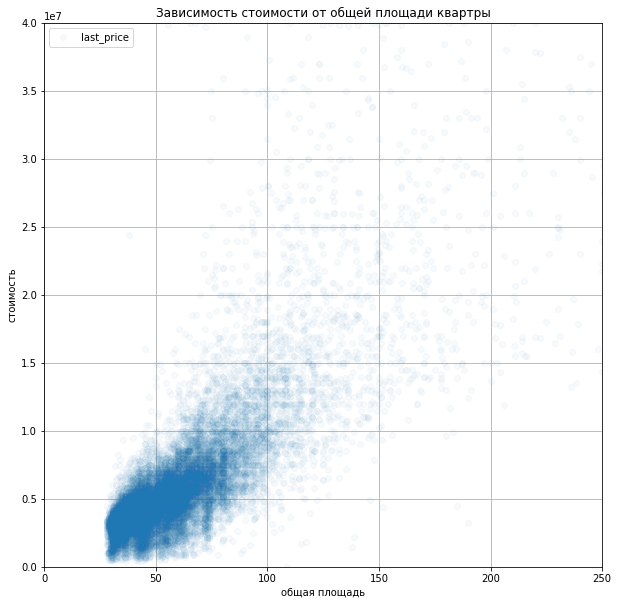

In [108]:
df.plot(x='total_area', y='last_price', style='o', grid=True, xlim=(0, 250), ylim=(0, 40000000), title=('Зависимость стоимости от общей площади квартры'), figsize=(10, 10), alpha=0.03)
plt.xlabel('общая площадь')
plt.ylabel('стоимость')
plt.show()

In [109]:
df['total_area'].corr(df['last_price'])

0.7142888591484353

Положительная корреляция между стоимостью и общей площадью квартиры равна 0,7.

###### Зависимость стоимости от жилой площади квартиры

In [110]:
df.pivot_table(index='living_area', values=['last_price', 'price_sq_m'], aggfunc='median')

,last_price,price_sq_m
living_area,,
2.0,6350000.0,122115.0
3.0,34715000.0,287922.5
5.4,6100000.0,78608.0
6.0,3799000.0,122548.0
6.5,4050000.0,122727.0
...,...,...
312.5,49950000.0,103223.0
322.3,140000000.0,221799.0
332.0,50000000.0,96711.0


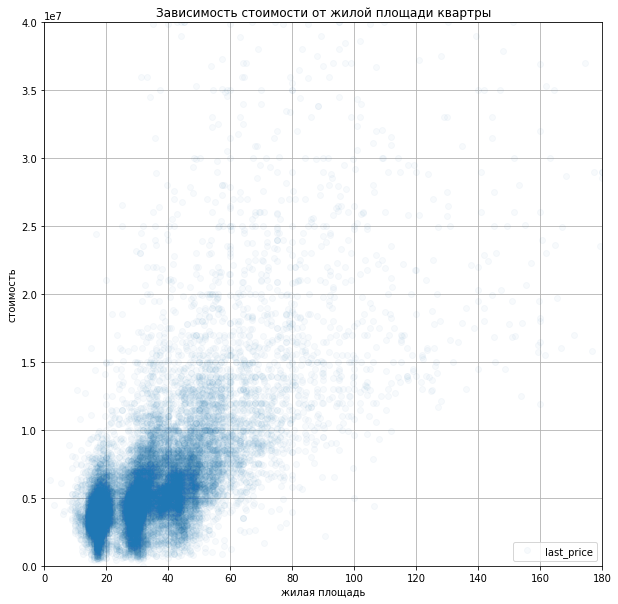

In [111]:
df.plot(x='living_area', y='last_price', style='o', grid=True, xlim=(0, 180), ylim=(0, 40000000), title=('Зависимость стоимости от жилой площади квартры'), figsize=(10, 10), alpha=0.03)
plt.xlabel('жилая площадь')
plt.ylabel('стоимость')
plt.show()

In [112]:
df['living_area'].corr(df['last_price'])

0.6262816794318756

Положительная корреляция между стоимостью и жилой площадью квартиры равна 0,6.

###### Зависимость стоимости от площади кухни

In [113]:
df.pivot_table(index='kitchen_area', values=['last_price', 'price_sq_m'], aggfunc='median')

,last_price,price_sq_m
kitchen_area,,
4.1,3660000.0,90594.0
4.2,2888000.0,57783.0
4.3,2400000.0,69767.0
4.4,1800000.0,52034.0
4.5,2750000.0,64147.0
...,...,...
93.0,65850000.0,451027.0
93.2,82400000.0,454997.0
100.0,65000000.0,110169.0


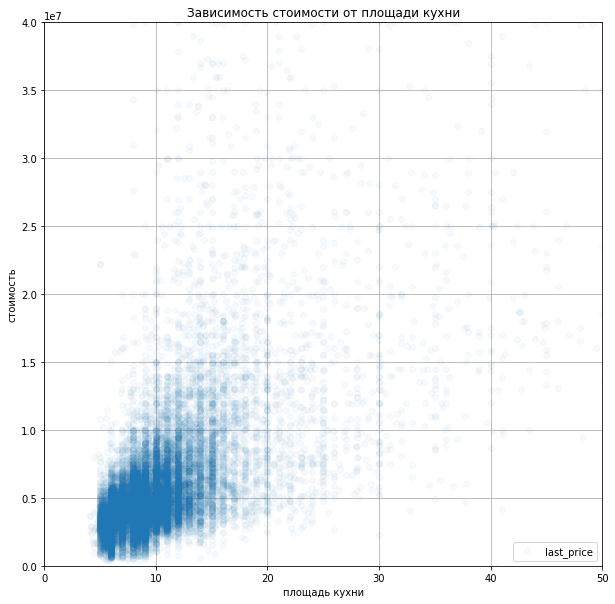

In [114]:
df.plot(x='kitchen_area', y='last_price', style='o', grid=True, xlim=(0, 50), ylim=(0, 40000000), title=('Зависимость стоимости от площади кухни'), figsize=(10, 10), alpha=0.03)
plt.xlabel('площадь кухни')
plt.ylabel('стоимость')
plt.show()

In [115]:
df['kitchen_area'].corr(df['last_price'])

0.5269601191512376

Положительная корреляция между стоимостью и площадью кухни равна 0,5.

###### Зависимость стоимости от количества комнат

In [116]:
df.pivot_table(index='rooms', values=['last_price', 'price_sq_m'], aggfunc='median')

,last_price,price_sq_m
rooms,,
1,3626500.0,100000.0
2,4800000.0,93050.0
3,6200000.0,89114.0
4,9000000.0,92673.0
5,14000000.0,96153.0
6,19000000.0,99253.0
7,24450000.0,109996.0
8,22190000.0,107333.0
9,24000000.0,96000.0


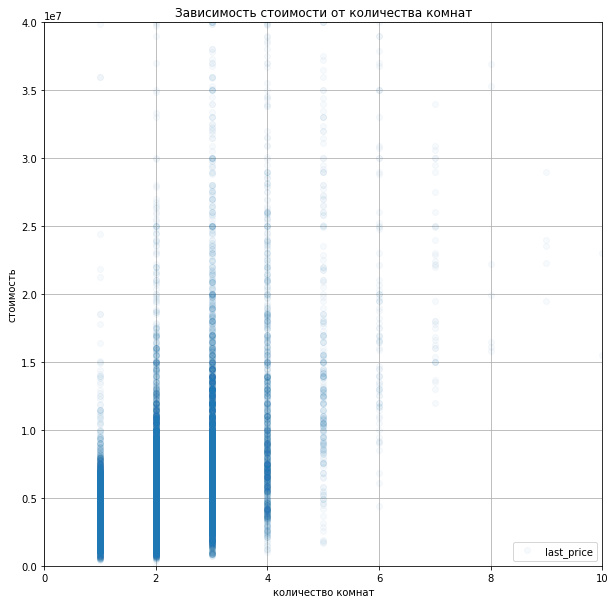

In [117]:
df.plot(x='rooms', y='last_price', style='o', grid=True, xlim=(0, 10), ylim=(0, 40000000), title=('Зависимость стоимости от количества комнат'), figsize=(10, 10), alpha=0.03)
plt.xlabel('количество комнат')
plt.ylabel('стоимость')
plt.show()

In [118]:
df['rooms'].corr(df['last_price'])

0.40926372697687907

Положительная корреляция между площадью и количеством комнат равна 0,4.

###### Зависимость стоимости от типа этажа

In [119]:
df.pivot_table(index='type_floor', values=['last_price', 'price_sq_m'], aggfunc='median')

,last_price,price_sq_m
type_floor,,
другой,4900000.0,98159.0
первый,3980000.0,81344.0
последний,4390000.0,88197.0


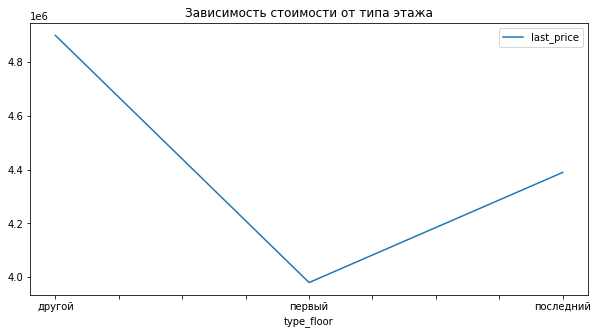

In [120]:
(df.pivot_table(index='type_floor', values='last_price', aggfunc='median')
    .plot(title=('Зависимость стоимости от типа этажа'), figsize=(10, 5)));

Есть зависимость между стоимостью и типом этажа - квартиры на первых и последних этажах стоят дешевле, чем на других.

###### Зависимость стоимости от даты размещения объявления

In [121]:
df.pivot_table(index='first_day_exposition', values=['last_price', 'price_sq_m'], aggfunc='median')

,last_price,price_sq_m
first_day_exposition,,
2014-11-27,13280560.0,138603.5
2014-11-29,5500000.0,102996.0
2014-12-04,3960875.0,104494.5
2014-12-05,1300000.0,24667.0
2014-12-08,3250000.0,81923.5
...,...,...
2019-04-29,4450000.0,101391.0
2019-04-30,5875000.0,113850.0
2019-05-01,6000000.0,118529.0


Посмотрим, есть ли зависимость между годами, месяцами и днями недели.

Построим график за весь период по дням.

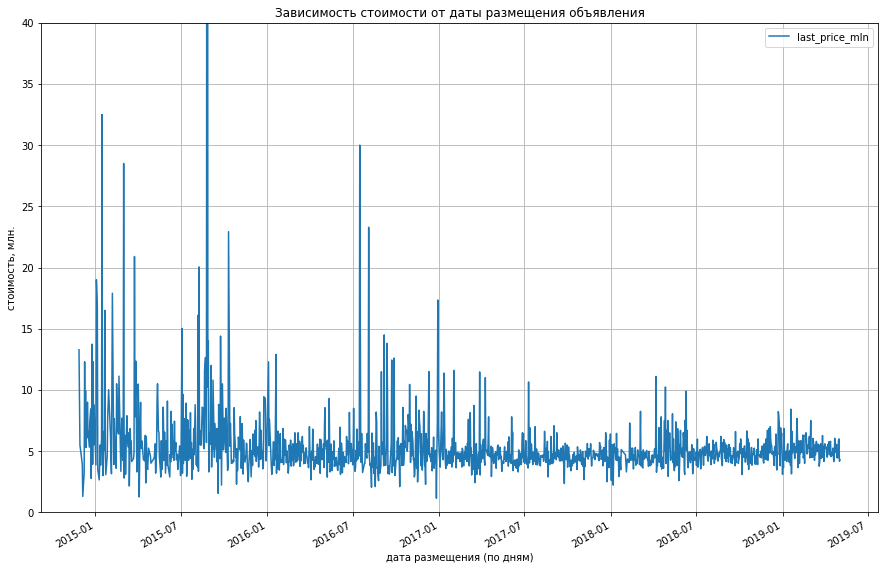

In [122]:
(df
    .pivot_table(index='first_day_exposition', values='last_price_mln', aggfunc='median')
    .plot(grid=True, ylim=(0, 40), title=('Зависимость стоимости от даты размещения объявления'), figsize=(15, 10))
)
plt.xlabel('дата размещения (по дням)')
plt.ylabel('стоимость, млн.')
plt.show()

На графике зависимости за все года видны определенные всплески цен в 2015-2017 годах. Возможно, это связано с дорогими квартирами, выставленными в определенные дни. Проверим предположение.

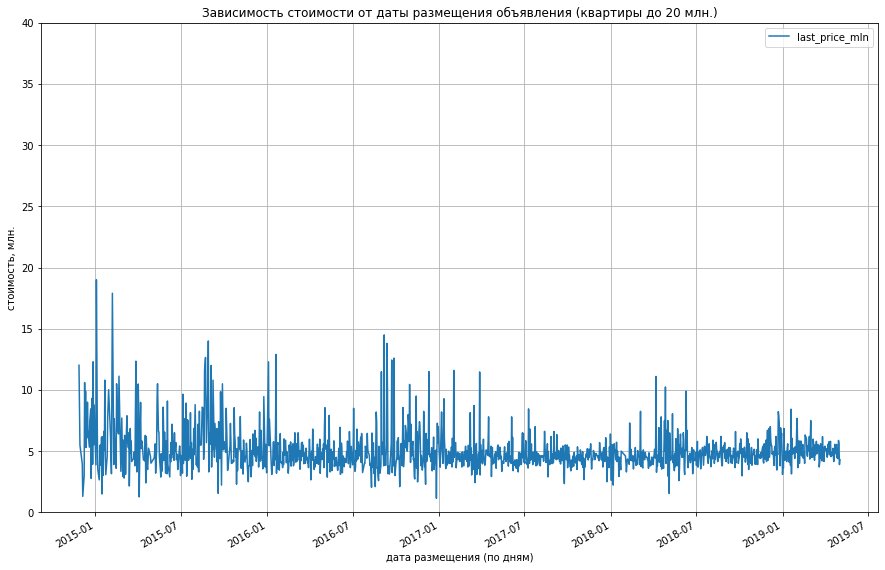

In [123]:
(df.query('last_price < 20000000')
    .pivot_table(index='first_day_exposition', values='last_price_mln', aggfunc='median')
    .plot(grid=True, ylim=(0, 40), title=('Зависимость стоимости от даты размещения объявления (квартиры до 20 млн.)'), figsize=(15, 10))
)
plt.xlabel('дата размещения (по дням)')
plt.ylabel('стоимость, млн.')
plt.show()

Мы убрали из датарейма квартиры дороже 20 млн. и пики исчезли. Предположение верно.  
Далее будем рассматривать квартиры стоимостью до 40 млн.

Посмотрим на весь период, объединенный по годам.

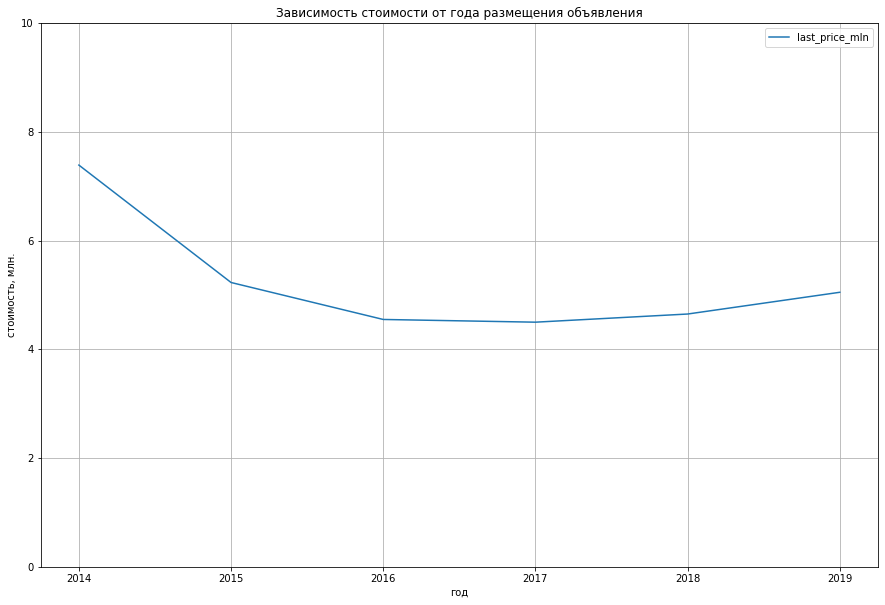

In [124]:
(df.query('last_price < 40000000')
    .pivot_table(index='year', values='last_price_mln', aggfunc='median')
    .plot(grid=True, ylim=(0, 10), title=('Зависимость стоимости от года размещения объявления'), figsize=(15, 10))
)
plt.xlabel('год')
plt.ylabel('стоимость, млн.')
plt.show()

Чётко виден спад стоимости квартир с 2014 по 2016 года. С 2017 года стоимость постепенно растет.

Проверим гипотезу о том, что очень дорогие квартиры создают рост средней цены. Зная, что большинство квартир размещаются за 3-6 млн., ограничим диапазон цены до 10 млн. и посмотрим на график по годам еще раз. 

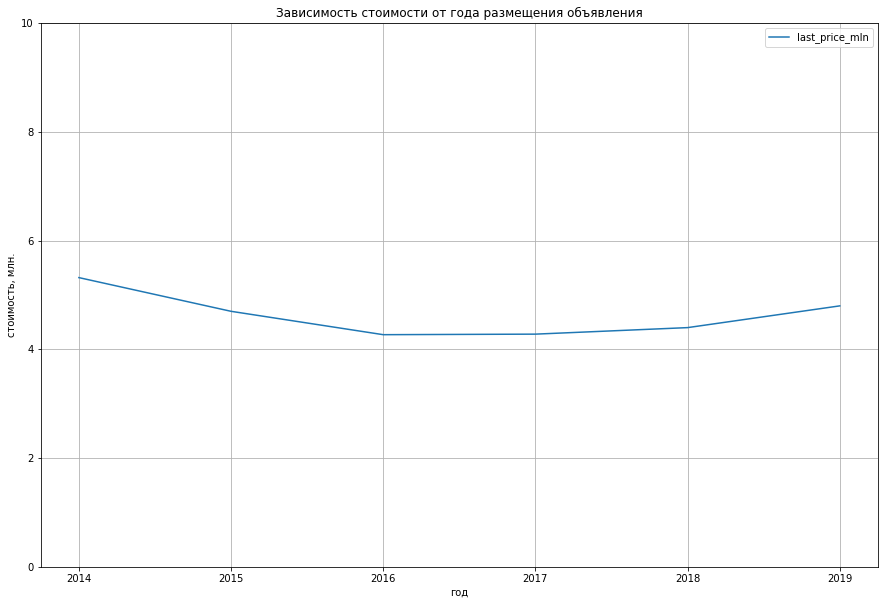

In [125]:
(df.query('last_price < 10000000')
    .pivot_table(index='year', values='last_price_mln', aggfunc='median')
    .plot(grid=True, ylim=(0, 10), title=('Зависимость стоимости от года размещения объявления'), figsize=(15, 10))
)
plt.xlabel('год')
plt.ylabel('стоимость, млн.')
plt.show()

Теперь видно, что год публикации действительно влиял на стоимость большинства квартир (силуэт графика пвторился), но разница не такая существенная.

Получается, что на стоимость квартир по годам влияет и количество дорогих квартир и события года.

Теперь посмотрим что происходит в рамках одного года, возьмем первый и последний из выборки.

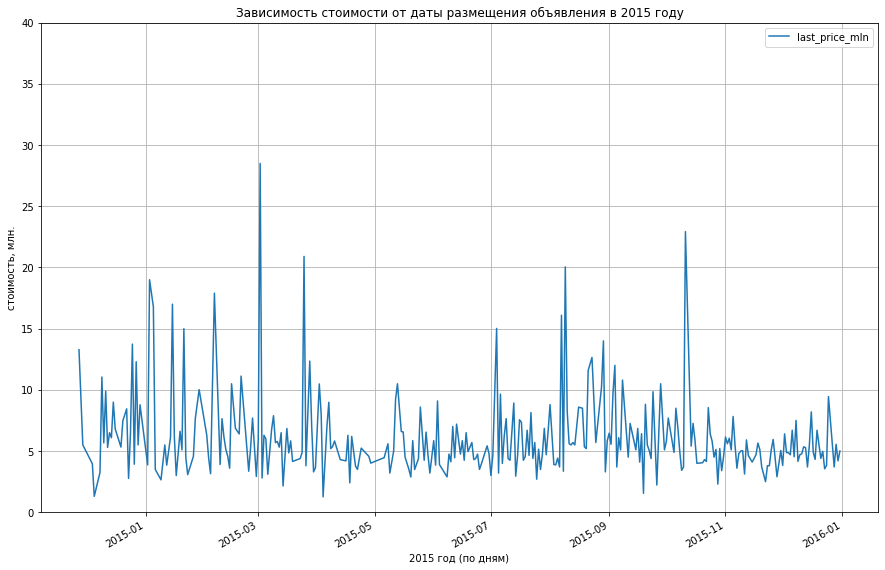

In [126]:
(df.query('first_day_exposition < 2016 & last_price < 40000000')
    .pivot_table(index='first_day_exposition', values='last_price_mln', aggfunc='median')
    .plot(grid=True, ylim=(0, 40), title=('Зависимость стоимости от даты размещения объявления в 2015 году'), figsize=(15, 10))
)
plt.xlabel('2015 год (по дням)')
plt.ylabel('стоимость, млн.')
plt.show()

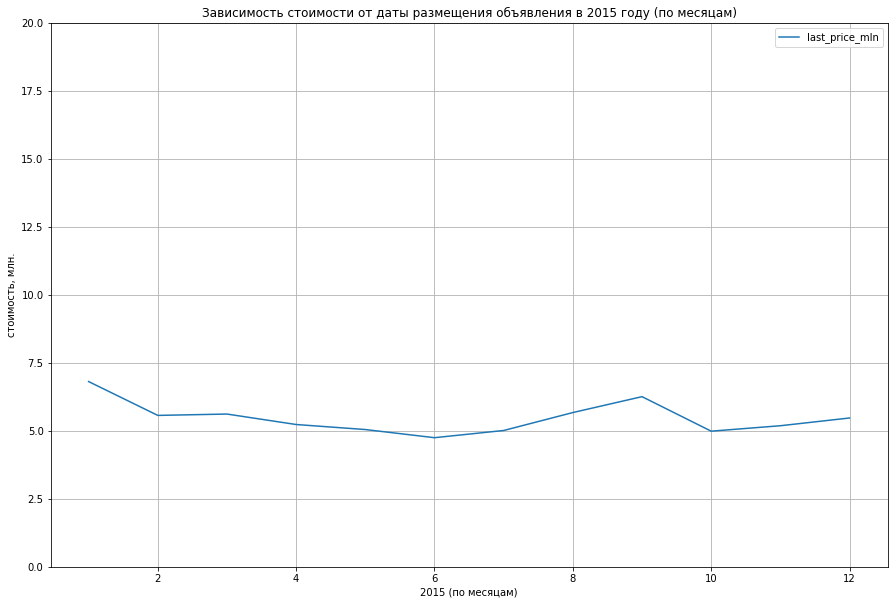

In [127]:
(df.query('first_day_exposition < 2016 & last_price < 40000000')
    .pivot_table(index='month', values='last_price_mln', aggfunc='median')
    .plot(grid=True, ylim=(0, 20), title=('Зависимость стоимости от даты размещения объявления в 2015 году (по месяцам)'), figsize=(15, 10))
)
plt.xlabel('2015 (по месяцам)')
plt.ylabel('стоимость, млн.')
plt.show()

Объединили период для наглядности по месяцам. Есть неравномерная зависимость, зимой и осенью цена в 2015 году была несколько выше, чем летом.

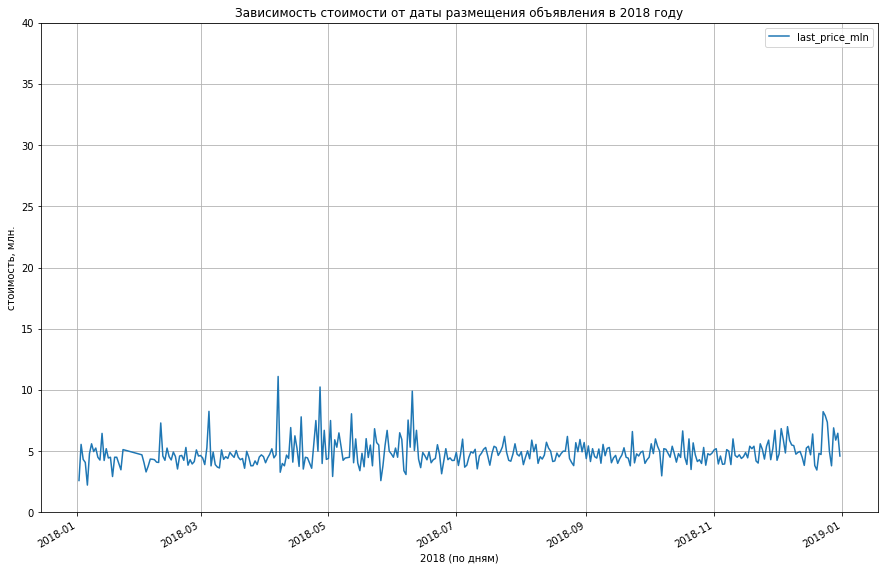

In [128]:
(df.query('2019 > first_day_exposition > 2018 & last_price < 40000000')
    .pivot_table(index='first_day_exposition', values='last_price_mln', aggfunc='median')
    .plot(grid=True, ylim=(0, 40), title=('Зависимость стоимости от даты размещения объявления в 2018 году'), figsize=(15, 10))
)
plt.xlabel('2018 (по дням)')
plt.ylabel('стоимость, млн.')
plt.show()

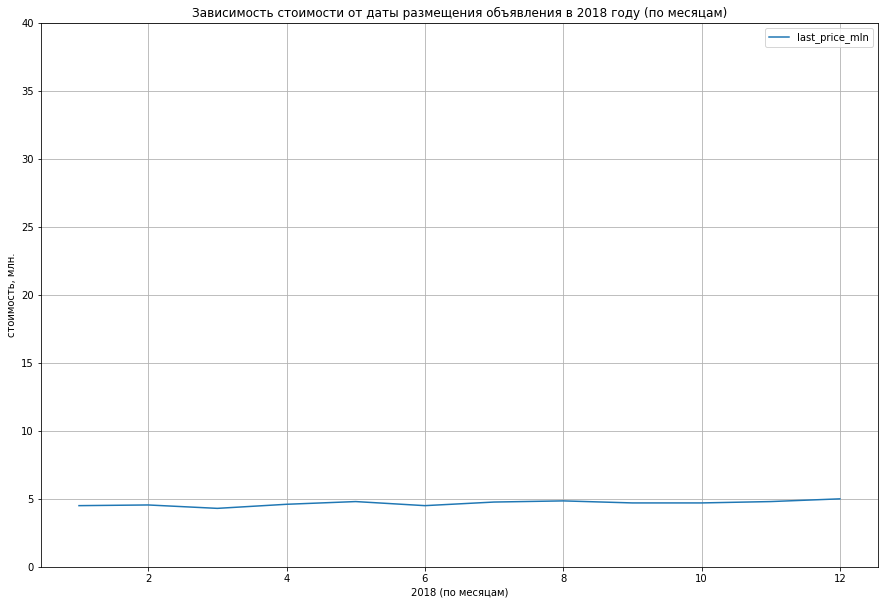

In [129]:
(df.query('2019 > first_day_exposition > 2018 & last_price < 40000000')
    .pivot_table(index='month', values='last_price_mln', aggfunc='median')
    .plot(grid=True, ylim=(0, 40), title=('Зависимость стоимости от даты размещения объявления в 2018 году (по месяцам)'), figsize=(15, 10))
)
plt.xlabel('2018 (по месяцам)')
plt.ylabel('стоимость, млн.')
plt.show()

Видим, что в последний год график более ровный, то есть стоимость цены распределена равномерно в течении года. На это могло повлиять более равномерная цена квартир (отсутствие дорогих квартир), а также большее количество размещенных объявлений за 2018 год, которые выравнивают медиану цены.

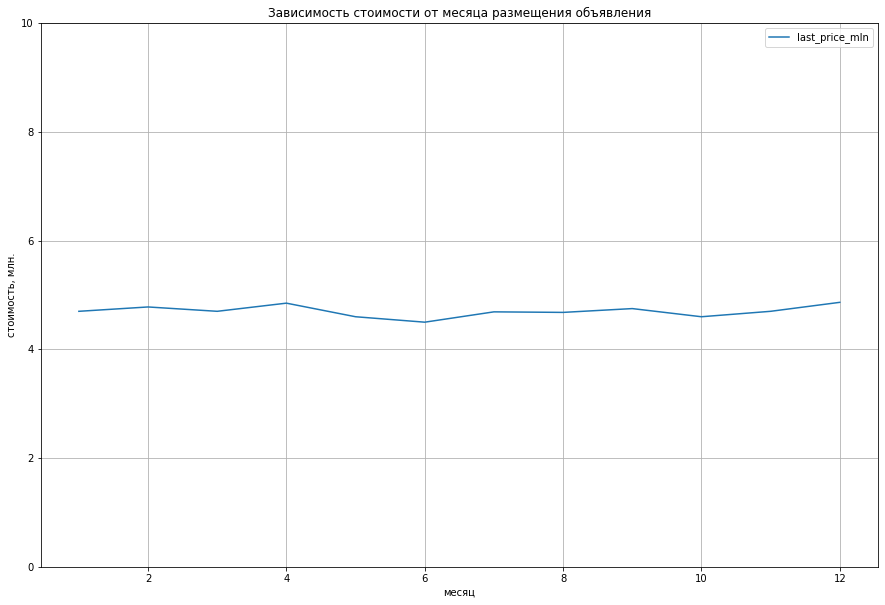

In [130]:
(df
    .pivot_table(index='month', values='last_price_mln', aggfunc='median')
    .plot(grid=True, ylim=(0, 10), title=('Зависимость стоимости от месяца размещения объявления'), figsize=(15, 10))
)
plt.xlabel('месяц')
plt.ylabel('стоимость, млн.')
plt.show()

Зависимость неравномерная, практически нулевая. Из этого графика мы можем сделать вывод, что на большом промежутке времени (≈ 5 лет) зависимости стоимости от месяца размещения нет.

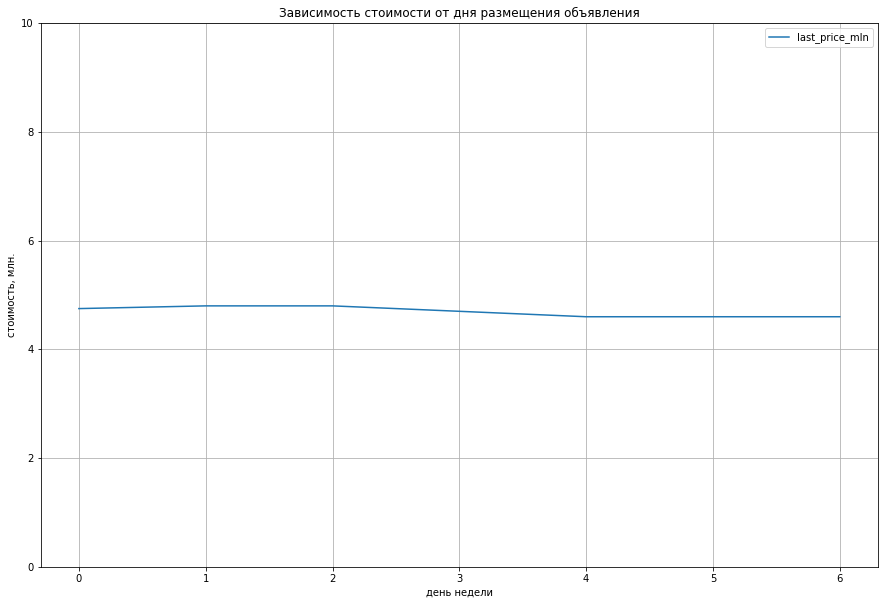

In [131]:
(df
    .pivot_table(index='weekday', values='last_price_mln', aggfunc='median')
    .plot(grid=True, ylim=(0, 10), title=('Зависимость стоимости от дня размещения объявления'), figsize=(15, 10))
)
plt.xlabel('день недели')
plt.ylabel('стоимость, млн.')
plt.show()

Зависимость также практически нулевая. Едва заметный спад в середине недели и на выходных.

Проверим эти данные в рамках одного года, возьмем 2018.

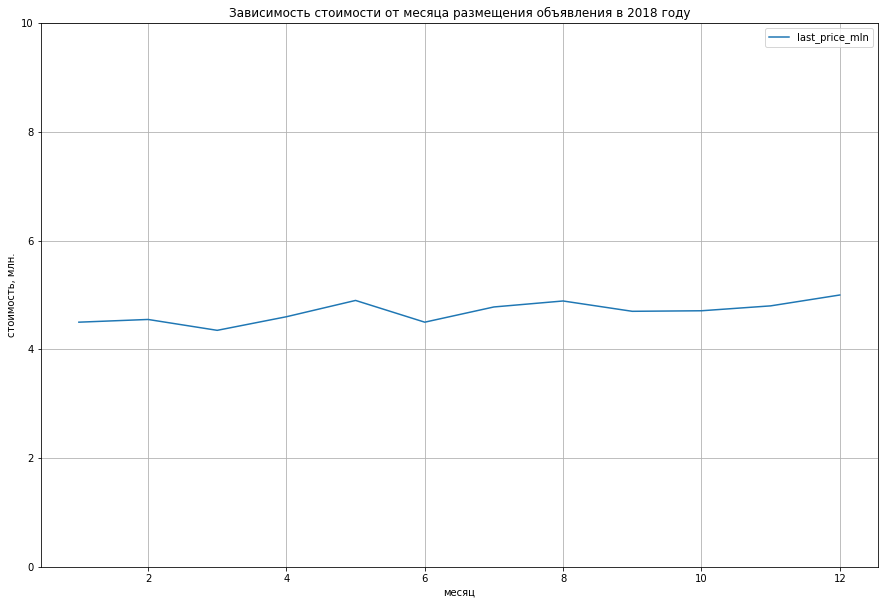

In [132]:
(df.query('2019 > first_day_exposition > 2018')
    .pivot_table(index='month', values='last_price_mln', aggfunc='median')
    .plot(grid=True, ylim=(0, 10), title=('Зависимость стоимости от месяца размещения объявления в 2018 году'), figsize=(15, 10))
)
plt.xlabel('месяц')
plt.ylabel('стоимость, млн.')
plt.show()

Есть едва заметная тенденция к росту цен к концу 2018 года. Это совпадает с общей тенденцией роста цен с 2017 года по 2019.

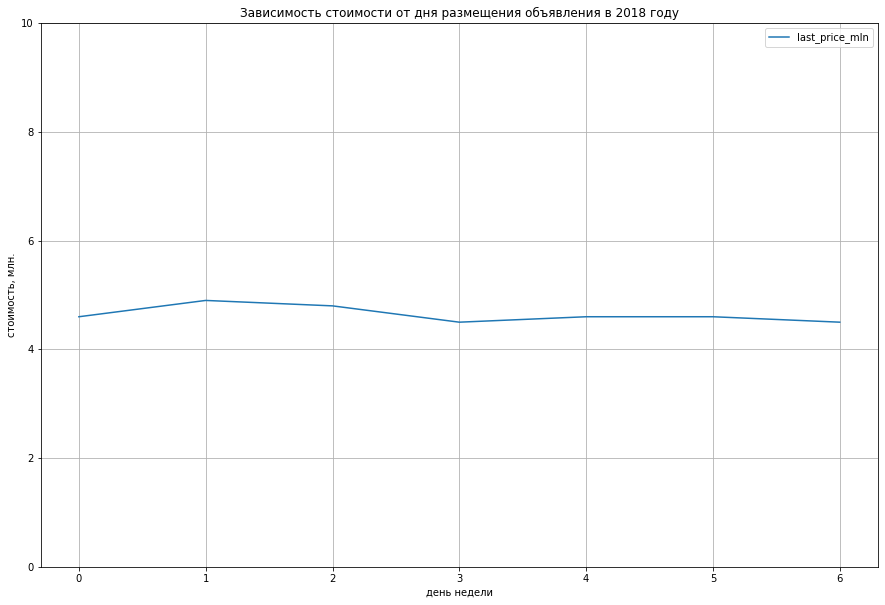

In [133]:
(df.query('2019 > first_day_exposition > 2018')
    .pivot_table(index='weekday', values='last_price_mln', aggfunc='median')
    .plot(grid=True, ylim=(0, 10), title=('Зависимость стоимости от дня размещения объявления в 2018 году'), figsize=(15, 10))
)
plt.xlabel('день недели')
plt.ylabel('стоимость, млн.')
plt.show()

По дням недели в 2018 году мы увидели тот же силуэт, что и за весь период, только чуть более выраженный (объясняется тем, что среднее значение за все года более сглаженное, чем за один год)

Дополнительно рассмотрим годовую динамику цены одного квадратного метра и площади продаваемых квартир.

Составим сводную таблицу со средней ценой квадратного метра и суммой площадей всех продаваемых квартир в год.  
(данные за 2019 год собраны только за первую треть года, исключим их, чтобы не искажать график)

In [134]:
price_per_year = (df.query('last_price < 40000000 & year != 2019')
    .pivot_table(index='year', values=['price_sq_m', 'total_area'], aggfunc=['median','sum']))
price_per_year.columns = ['median_price_sq_m', 's', 'm', 'sum_total_area']

In [135]:
price_per_year = price_per_year.loc[:,['median_price_sq_m', 'sum_total_area']]
display(price_per_year)

,median_price_sq_m,sum_total_area
year,,
2014,106265.5,9770.30
2015,91860.0,71292.28
2016,90681.0,153340.73
2017,92250.0,439058.07
2018,95833.0,427419.25


Построим по ней график:

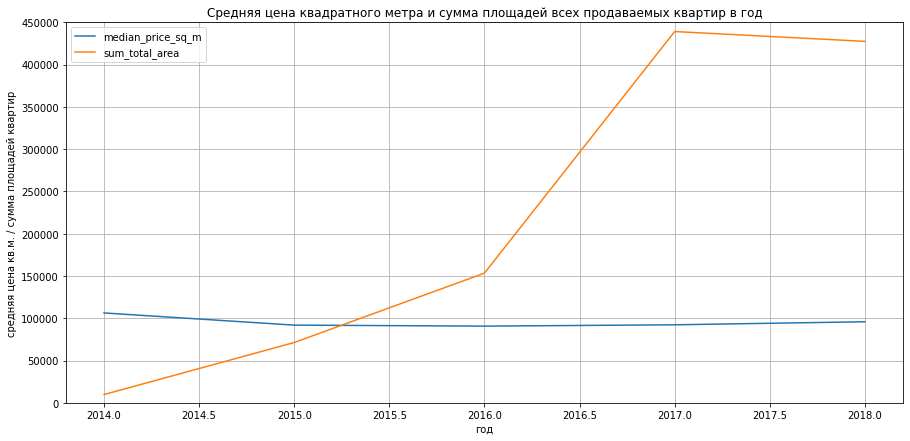

In [136]:
price_per_year.plot(grid=True, ylim=(0, 450000), title=('Средняя цена квадратного метра и сумма площадей всех продаваемых квартир в год'), figsize=(15, 7))
plt.xlabel('год')
plt.ylabel('средняя цена кв.м. / сумма площадей квартир')
plt.show()

Площадь продаваемых квартир выросла за пять лет в несколько раз! Очевидно, это говорит о большом росте популярности платформы Яндекс Недвижимость. Средняя цена квадратного метра при этом почти не изменилась, она повторяет слабую дугу графика зависимости стоимости квартиры от года, что подтверждает правильность расчетов, продублируем его ещё раз:

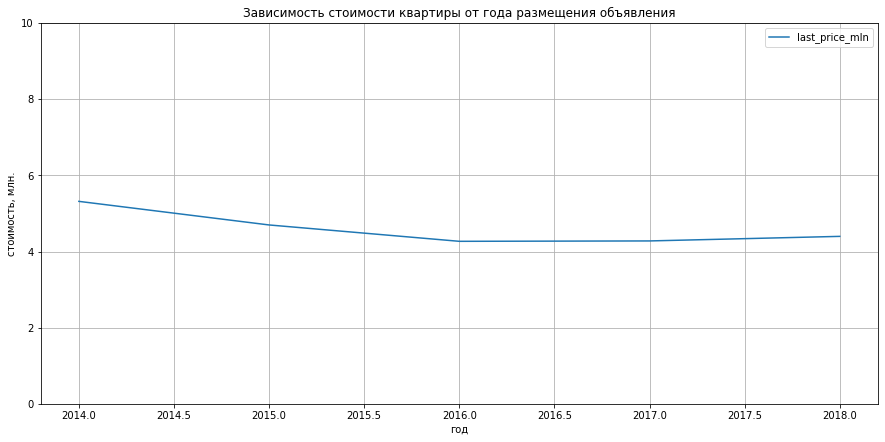

In [137]:
(df.query('last_price < 10000000 & year != 2019')
    .pivot_table(index='year', values='last_price_mln', aggfunc='median')
    .plot(grid=True, ylim=(0, 10), title=('Зависимость стоимости квартиры от года размещения объявления'), figsize=(15, 7))
)
plt.xlabel('год')
plt.ylabel('стоимость, млн.')
plt.show()

Общий вывод по зависимости стоимости от даты размещения:
- существует зависимость стоимости квартиры от года размещения её объявления (колебание цены в диапазоне 20%). На это влияет как количество дорогих квартир, размещенных в определенный год, так и изменение цены за квадратный метр в этот год (колебание цены в диапазоне 15%). 
- существует зависимость стоимости квартиры от года размещения объявления из-за изменения стоимости квадратного метра в год (колебание цены в диапазоне 15%). На графике мы также увидели несколько всплесков цен, но после проверки выявили, что общий рост цены обусловлен конкретными дорогими объектами и не связан со средней стоимостью большинства квартир.
- существенной зависимости между стоимостью и месяцем / днем размещения нет. 
- популярность сервиса Яндекс Недвижимость существенно выросла за 5 лет

##### Стоимость квадратного метра в 10 населенных пунктах с наибольшим числом объявлений

In [138]:
top_locality = df.pivot_table(index='locality_name', values='price_sq_m', aggfunc=['count', 'median','mean']).round()
top_locality.columns = ['count', 'median_price_sq_m', 'mean']
top_locality.sort_values(by='count', ascending=False).head(10)

,count,median_price_sq_m,mean
locality_name,,,
Санкт-Петербург,14264,104347.0,113831.0
Мурино,437,83636.0,84785.0
Шушары,396,77048.0,78371.0
Всеволожск,356,65789.0,69009.0
Пушкин,337,100000.0,103198.0
Колпино,321,74722.0,75223.0
Гатчина,293,67924.0,68733.0
Парголово,289,92261.0,90691.0
Кудрово,229,91410.0,92094.0


##### Средняя цена километра

In [139]:
sp_locality = (
    df.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest', values='price_sq_m', aggfunc=['median','mean']).round())
sp_locality.columns = ['median_price_sq_m', 'mean']
display(sp_locality)

,median_price_sq_m,mean
city_centers_nearest,,
0,137755.0,191296.0
1,123529.0,146549.0
2,116363.0,149192.0
3,109656.0,124092.0
4,125544.0,135700.0
5,125723.0,145952.0
6,129166.0,150334.0
7,125036.0,141650.0
8,113793.0,119796.0


<AxesSubplot:title={'center':'Средняя цена километра'}, xlabel='city_centers_nearest'>

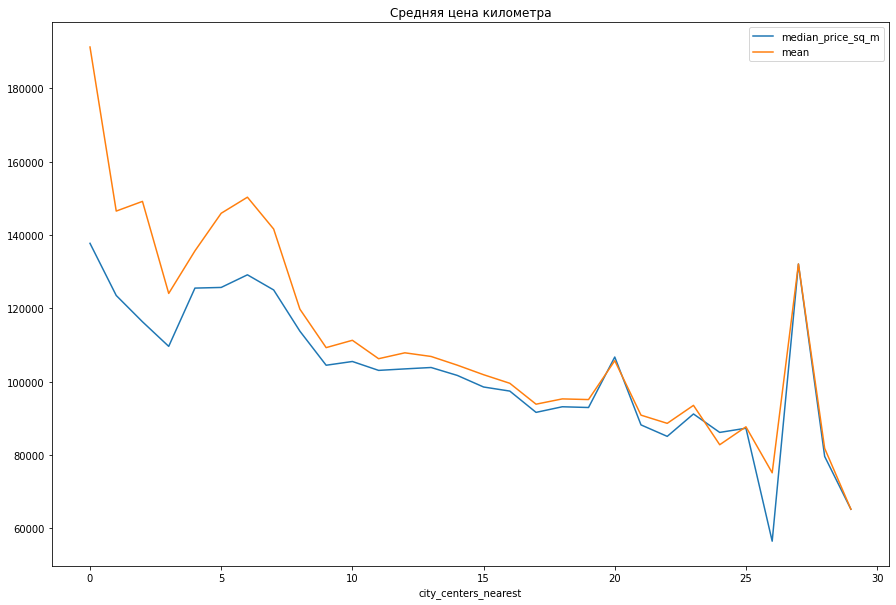

In [140]:
sp_locality.plot(title=('Средняя цена километра'), figsize=(15, 10))

In [141]:
df.query('locality_name == "Санкт-Петербург" & city_centers_nearest == 27')

,total_images,first_day_exposition,days_exposition,last_price,price_sq_m,total_area,living_area,kitchen_area,rooms,ceiling_height,floors_total,floor,type_floor,balcony,is_apartment,studio,open_plan,locality_name,city_centers_nearest,airports_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,weekday,month,year,last_price_mln
748,13,2017-11-28,128.0,14350000.0,193918.0,74.0,30.0,25.0,2,3.13,5,3,другой,0,False,False,False,Санкт-Петербург,27,23,1.0,1496.0,0.0,NaN,1,11,2017,14.35
5961,6,2018-02-27,178.0,2250000.0,70312.0,32.0,16.5,7.0,1,2.65,2,2,последний,0,False,False,False,Санкт-Петербург,27,24,0.0,NaN,0.0,NaN,1,2,2018,2.25


Проверили какие квартиры создают пик на 27 км, их всего две и одна из них имеет высокую стоимость за квадратный метр, остальные параметры нормальные, будем считать ее исключением.

Стоимость квадратного метра объекта растет по мере его приближения к центру города.

### ОБЩИЙ ВЫВОД

Мы провели исследовательский анализ данных сервиса Яндекс Недвижимость и отследили некоторые закономерности.  
Для начала подготовили данные - обработали большое количество пропусков, заменив их на медианы или на логически подходящие значения. Большинство пропусков не были значимыми для исследования и не помешали аналитике. 

Далее разобрались с аномальными значениями - убрали нереалистично дешевые квартиры и очень дорогие, параметры которых не соответствовали цене или площади; отсеяли объекты, которые по площади не являлись квартирами; адаптировали высоты потолков в соответствии с жилыми стандартами и с учетом допуска ошибок в заполнени формы; убрали квартиры со слишком большой площадью кухни. 

В даных были найдены дубликаты населенные пунктов объектов, это наиболее важный параметр для исследования, их мы привели к единому формату так, что объекты совпадали.

Для удобства работы добавили несколько столбцов: цена за квадратный метр - наиболее характерный показатель для аналитики недвижимости, тип этажа, параметры даты публикации - год, месяц, день. 
Перевели единицы измерения в удобный формат - метры в километры, рубли в миллионы.

Мы получили общее представление о наиболее популярном типе жилья, размещаемом на сервисе Яндекс недвижимость.  
**Получившийся "портрет квартиры":**
- площадь 30-60 кв.м. 
- кухня площадью 8-10 кв.м.
- стоимость 3-6 млн.
- 1-3-х комнатная
- высота потолков 2,6 м
- на 1-5 этаже 
- в 5 или 9 этажном доме
- удаленная от центра на 12-14 км
- имеющая парк в пешей доступности 200-700 м
- продажа осуществляется за 3, 5 месяца

Теперь подробнее о результатах исследования. Исследовательский анализ показал интересные зависимости

**Зависимость цены от параметров квартиры**  
- Существует положительная корреляция между ценой и площадью (общей, жилой, кухни), количеством комнат. 
- Квартиры на первых и последних этажах стоят дешевле, чем на других (разница в цене до 17%).
- Есть зависимость стоимости квартиры от года размещения объявления, она объясняется измененим стоимости квадратного метра на длительном промежутке времени (колебание цены до 15%). На графике мы также увидели несколько всплесков цен, но после проверки выявили, что общий рост цен обусловлен конкретными дорогими объектами и не связан со средней стоимостью большинства квартир.
- Стоимость квадратного метра объекта значимо растет по мере его приближения к центру города.
- Стоимость квартир в Санкт-Птербурге и Пушкине выше, чем в остальных населенных пунктах. 
- Есть длительные тенденции роста или спада цены за квадратный метр (2015-2016 спад, 2017-2019 рост)
- Слабая зависимость стоимости квартиры с сезоном - стоимость несущественно увеличивается зимой и осенью.   
- Значимой зависимости между стоимостью и месяцем, днем размещения нет. 

**Публикация объявлений**  
Неожиданными оказались дни, которые люди выбирают для публикации объявлений - во вторник и четверг объявления публикуют чуть чаще, чем в остальные дни, а на выходных публикация существенно ниже, чем в буднии.

В месяцах публикации результат совпал с интуитивными ожиданиями - объявления чаще всего размещают ранней весной и осенью. В мае, декабре и январе - меньше всего публикаций. Можно предположить, что это связано с дачным сезоном и новогодними праздниками.

Также отметим, что популярность сервиса Яндекс Недвижимость существенно выросла за 5 лет. Количество публикуемых объявлений с 2015 до 2019 года увеличилось в 7 раз!